<a href="https://colab.research.google.com/github/charmy2525/DataAnalytics/blob/main/Data_Analytics_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#1. Data Cleaning

## Load Data

In [ ]:
import pandas as pd
data = pd.read_csv('https://raw.githubusercontent.com/charmy2525/DataAnalytics/main/Data%20analytics%20course%20data%20set%20-%20student%20academic%20performance%20-%20missing%20data.csv')

In [ ]:
data

,Student_ID,Year_of_Entry,TCAS_channels_,Gender,Age,Years_Living_in_BKK,Hometown REGION,Address_Type,Where_to_stay,Time_spent_for_traveling,...,Chemistry_.1,Statistics_,Computer_Programming,Thermodynamics_,Engineering_Materials_,Engineering_Drawing,University_GPAx 1st year,Scholarship : Excellent Performance,Scholarship : Financial Aid,Participation_on_Activities
0,1,2020.0,3.0,Female,18.0,0,S,Urban,Apartment,36,...,1.5,2.0,1.5,0.0,1.0,2.0,1.78,No,No,Medium
1,2,2020.0,3.0,Male,18.0,18,BKK,Urban,Home,5,...,3.5,3.5,2.5,4.0,3.0,1.0,2.86,No,No,No
2,3,2020.0,3.0,Male,18.0,NaN,BKK,Urban,Apartment,76,...,2.5,3.0,4.0,3.0,2.5,2.0,3.20,No,No,No
3,4,2020.0,1.0,Male,18.0,3,BKK,Urban,Home,77,...,1.5,2.5,2.0,2.0,1.5,2.0,2.20,No,No,Medium
4,5,2020.0,2.0,Female,18.0,18,BKK,Urban,Home,1001,...,1.0,2.5,1.5,1.5,2.5,3.0,2.19,No,No,High
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1217,1196,2018.0,3.0,Female,18.0,0,S,Urban,Apartment,17,...,4.0,3.5,3.0,2.0,4.0,2.5,3.23,No,No,High
1218,1197,2018.0,2.0,Female,18.0,18,BKK,Urban,Home,23,...,1.0,2.0,2.0,3.0,2.0,2.0,2.01,No,No,Medium
1219,1198,NaN,2.0,Female,18.0,0,S,Rural,Apartment,26,...,1.0,3.0,2.0,1.0,3.0,1.5,2.06,No,No,Medium
1220,1199,2018.0,2.0,Female,19.0,19,BKK,Urban,Apartment,50,...,2.0,2.5,1.5,1.5,1.0,2.5,1.93,No,No,Medium


In [ ]:
'Revised'

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1222 entries, 0 to 1221
Data columns (total 43 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Student_ID                           1222 non-null   int64  
 1   Year_of_Entry                        1114 non-null   float64
 2   TCAS_channels_                       1153 non-null   float64
 3   Gender                               1160 non-null   object 
 4   Age                                  1159 non-null   float64
 5   Years_Living_in_BKK                  1176 non-null   object 
 6   Hometown REGION                      1175 non-null   object 
 7   Address_Type                         1162 non-null   object 
 8   Where_to_stay                        1168 non-null   object 
 9   Time_spent_for_traveling             1222 non-null   int64  
 10  InternetAccess_at_Home               1222 non-null   object 
 11  Living_expenses_              

## Missing data

Check missing data

In [ ]:
df=data.copy()
df.isnull().sum()# ดูว่ามี ช่องว่าง column ละกี่จุด

Student_ID                               0
Year_of_Entry                          108
TCAS_channels_                          69
Gender                                  62
Age                                     63
Years_Living_in_BKK                     46
Hometown REGION                         47
Address_Type                            60
Where_to_stay                           54
Time_spent_for_traveling                 0
InternetAccess_at_Home                   0
Living_expenses_                         0
Type_of_prior_school                    25
Prior_School_Province REGION             0
School name                              0
Math                                     0
Physics_                                 0
Chemistry_                               0
Biology_                                 0
Family_Size                              0
Stay_with                                0
Family_status                            0
Father_Education                         0
Mother_Educ

remove row

In [ ]:
#remove for unpredictable feature and significant feature
df2=df.copy()
'''
feature                         isnull.sum()
===========================================
Year_of_Entry                          95  predictable from other rows
TCAS_channels_                         69 *unpredictable
Gender                                 64  no significant
Age                                    57  no significant
Years_Living_in_BKK                    51  no significant
Hometown REGION                        50  predictable from 'Prior_School_Province REGION' even may not 100% accurate
Address_Type                           65  predictable from 'Hometown REGION' in BKK will be Urban
                                          *unpredictable if 'Hometown REGION' is outside 
                                           fill the BKK first then remove other rows which are outside BKK
Where_to_stay                          56  predictable from 'Hometown REGION' in BKK may stay at Homw outside BKK may stay at Apartment
                                           even may not 100% accurate
Type_of_prior_school                   21 *unpredictable
'''

df2 = df2.dropna(subset=['TCAS_channels_'])
df2 = df2.dropna(subset=['Type_of_prior_school'])

df=df2.copy()
#print(df.isnull().sum(),end='\n\n')
print(f'Loss of data : \n{data.isnull().sum()-df.isnull().sum()}')

Loss of data : 
Student_ID                              0
Year_of_Entry                           9
TCAS_channels_                         71
Gender                                  7
Age                                     5
Years_Living_in_BKK                     6
Hometown REGION                         9
Address_Type                            4
Where_to_stay                           7
Time_spent_for_traveling                0
InternetAccess_at_Home                  0
Living_expenses_                        0
Type_of_prior_school                   31
Prior_School_Province REGION            0
School name                             0
Math                                    0
Physics_                                0
Chemistry_                              0
Biology_                                0
Family_Size                             0
Stay_with                               0
Family_status                           0
Father_Education                        0
Mother_Education  

fill the missing data

In [ ]:
'''
feature                         isnull.sum()
===========================================
Year_of_Entry                          95  predictable from other rows
TCAS_channels_                         69 Done *unpredictable
Gender                                 64  no significant
Age                                    57  no significant
Years_Living_in_BKK                    51  no significant
Hometown REGION                        50  predictable from 'Prior_School_Province REGION' even may not 100% accurate
Address_Type                           65  predictable from 'Hometown REGION' in BKK will be Urban
                                          *unpredictable if 'Hometown REGION' is outside 
                                           fill the BKK first then remove other rows which are outside BKK
Where_to_stay                          56  predictable from 'Hometown REGION' in BKK may stay at Homw outside BKK may stay at Apartment
                                           even may not 100% accurate
Type_of_prior_school                   21 Done *unpredictable
'''

#deal with Year_of_entry
df2=df.copy()
df3=df2['Year_of_Entry'].copy()
df3=df3.fillna(method='ffill')

''' Check the prediction and fill
for ind in df2.index:
  if df2['Year_of_Entry'].isnull()[ind] :
    print(ind,df2['Year_of_Entry'][ind],df3[ind])

print(df2['Year_of_Entry'].isnull().sum(),df3.isnull().sum())

'''

df2['Year_of_Entry']=df3.copy()
df=df2.copy()
print(df2['Year_of_Entry'].isnull().sum()) #Check data

0


In [ ]:
'''
feature                         isnull.sum()
===========================================
Year_of_Entry                          95 Done predictable from other rows
TCAS_channels_                         69 Done *unpredictable
Gender                                 64  no significant
Age                                    57  no significant
Years_Living_in_BKK                    51  no significant
Hometown REGION                        50  predictable from 'Prior_School_Province REGION' in BKK will be BKK
                                          *unpredictable if 'Prior_School_Province REGION' is outside BKK 
                                           fill the BKK first then remove other rows which are outside BKK
                                           even may not 100% accurate
Address_Type                           65  predictable from 'Hometown REGION' in BKK will be Urban
                                          *unpredictable if 'Hometown REGION' is outside 
                                           fill the BKK first then remove other rows which are outside BKK
Where_to_stay                          56  predictable from 'Hometown REGION' in BKK may stay at Homw outside BKK may stay at Apartment
                                           even may not 100% accurate
Type_of_prior_school                   21 Done *unpredictable
'''

#deal with Hometown REGION
#print(df2['Hometown REGION'].isnull().sum())
df2=df.copy()
df3=df2['Hometown REGION'].copy()
for ind in df2.index:
  if df2['Hometown REGION'].isnull()[ind]  and df2['Prior_School_Province REGION'][ind]=='BKK' :
    df3[ind]=df2['Prior_School_Province REGION'][ind]


'''
#Check the prediction and fill
for ind in df2.index:
  if df2['Hometown REGION'].isnull()[ind] :
    print(ind,df2['Hometown REGION'][ind],df3[ind])

print(df2['Hometown REGION'].isnull().sum(),df3.isnull().sum())
'''


df2['Hometown REGION']=df3.copy()
df2 = df2.dropna(subset=['Hometown REGION'])

#print(df.isnull().sum(),end='\n\n')
print(f'Loss of data : \n{df.isnull().sum()-df2.isnull().sum()}')

df=df2.copy()
#print(df2['Hometown REGION'].isnull().sum()) #Check data

Loss of data : 
Student_ID                              0
Year_of_Entry                           0
TCAS_channels_                          0
Gender                                  3
Age                                     0
Years_Living_in_BKK                     1
Hometown REGION                        61
Address_Type                            0
Where_to_stay                           1
Time_spent_for_traveling                0
InternetAccess_at_Home                  0
Living_expenses_                        0
Type_of_prior_school                    0
Prior_School_Province REGION            0
School name                             0
Math                                    0
Physics_                                0
Chemistry_                              0
Biology_                                0
Family_Size                             0
Stay_with                               0
Family_status                           0
Father_Education                        0
Mother_Education  

In [ ]:
'''
feature                         isnull.sum()
===========================================
Year_of_Entry                          95 Done predictable from other rows
TCAS_channels_                         69 Done *unpredictable
Gender                                 64  no significant
Age                                    57  no significant
Years_Living_in_BKK                    51  no significant
Hometown REGION                        50 Done predictable from 'Prior_School_Province REGION' even may not 100% accurate
Address_Type                           65  predictable from 'Hometown REGION' in BKK will be Urban
                                          *unpredictable if 'Hometown REGION' is outside 
                                           fill the BKK first then remove other rows which are outside BKK
Where_to_stay                          56  predictable from 'Hometown REGION' in BKK may stay at Homw outside BKK may stay at Apartment
                                           even may not 100% accurate
Type_of_prior_school                   21 Done *unpredictable
'''

#deal with Address_Type
#print(df2['Address_Type'].isnull().sum())
df2=df.copy()
df3=df2['Address_Type'].copy()
for ind in df2.index:
  if df2['Address_Type'].isnull()[ind]  and df2['Hometown REGION'][ind]=='BKK' :
    df3[ind]='Urban'


'''
#Check the prediction and fill
for ind in df2.index:
  if df2['Address_Type'].isnull()[ind] :
    print(ind,df2['Address_Type'][ind],df3[ind])

print(df2['Address_Type'].isnull().sum(),df3.isnull().sum())
'''


df2['Address_Type']=df3.copy()
df2 = df2.dropna(subset=['Address_Type'])

#print(df.isnull().sum(),end='\n\n')
print(f'Loss of data : \n{df.isnull().sum()-df2.isnull().sum()}')


df=df2.copy()
#print(df2['Address_Type'].isnull().sum()) #Check data



Loss of data : 
Student_ID                              0
Year_of_Entry                           0
TCAS_channels_                          0
Gender                                  1
Age                                     1
Years_Living_in_BKK                     1
Hometown REGION                         0
Address_Type                           56
Where_to_stay                           0
Time_spent_for_traveling                0
InternetAccess_at_Home                  0
Living_expenses_                        0
Type_of_prior_school                    0
Prior_School_Province REGION            0
School name                             0
Math                                    0
Physics_                                0
Chemistry_                              0
Biology_                                0
Family_Size                             0
Stay_with                               0
Family_status                           0
Father_Education                        0
Mother_Education  

In [ ]:
'''
feature                         isnull.sum()
===========================================
Year_of_Entry                          95 Done predictable from other rows
TCAS_channels_                         69 Done *unpredictable
Gender                                 64  no significant
Age                                    57  no significant
Years_Living_in_BKK                    51  no significant
Hometown REGION                        50 Done predictable from 'Prior_School_Province REGION' even may not 100% accurate
Address_Type                           65 Done predictable from 'Hometown REGION' in BKK will be Urban
                                          *unpredictable if 'Hometown REGION' is outside 
                                           fill the BKK first then remove other rows which are outside BKK
Where_to_stay                          56  predictable from 'Hometown REGION' in BKK may stay at Home outside BKK may stay at Apartment
                                           even may not 100% accurate
Type_of_prior_school                   21 Done *unpredictable
'''
#Deal with Where_to_stay
#print(df2['Where_to_stay'].isnull().sum())
df2=df.copy()
df3=df2['Where_to_stay'].copy()
for ind in df2.index:
  if df2['Where_to_stay'].isnull()[ind]:
    if df2['Hometown REGION'][ind]=='BKK' :
      df3[ind]='Home'
    else :
      df3[ind]='Apartment'


'''
#Check the prediction and fill
for ind in df2.index:
  if df2['Where_to_stay'].isnull()[ind] :
    print(ind,df2['Where_to_stay'][ind],df3[ind])

print(df2['Where_to_stay'].isnull().sum(),df3.isnull().sum())
'''


df2['Where_to_stay']=df3.copy()
df=df2.copy()

'''
feature                         isnull.sum()
===========================================
Year_of_Entry                          95 Done predictable from other rows
TCAS_channels_                         69 Done *unpredictable
Gender                                 64  no significant
Age                                    57  no significant
Years_Living_in_BKK                    51  no significant
Hometown REGION                        50 Done predictable from 'Prior_School_Province REGION' even may not 100% accurate
Address_Type                           65 Done predictable from 'Hometown REGION' in BKK will be Urban
                                          *unpredictable if 'Hometown REGION' is outside 
                                           fill the BKK first then remove other rows which are outside BKK
Where_to_stay                          56 Done predictable from 'Hometown REGION' in BKK may stay at Home outside BKK may stay at Apartment
                                           even may not 100% accurate
Type_of_prior_school                   21 Done *unpredictable
'''
print('')
print(data.isnull().sum(),df.isnull().sum())



Student_ID                               0
Year_of_Entry                          122
TCAS_channels_                          71
Gender                                  73
Age                                     63
Years_Living_in_BKK                     47
Hometown REGION                         70
Address_Type                            60
Where_to_stay                           63
Time_spent_for_traveling                 0
InternetAccess_at_Home                   0
Living_expenses_                         0
Type_of_prior_school                    31
Prior_School_Province REGION             0
School name                              0
Math                                     0
Physics_                                 0
Chemistry_                               0
Biology_                                 0
Family_Size                              0
Stay_with                                0
Family_status                            0
Father_Education                         0
Mother_Edu

remove non significant features

In [ ]:
df=df.drop(columns=['Gender','Age' ,'Years_Living_in_BKK'])
df

,Student_ID,Year_of_Entry,TCAS_channels_,Hometown REGION,Address_Type,Where_to_stay,Time_spent_for_traveling,InternetAccess_at_Home,Living_expenses_,Type_of_prior_school,...,Chemistry_.1,Statistics_,Computer_Programming,Thermodynamics_,Engineering_Materials_,Engineering_Drawing,University_GPAx 1st year,Scholarship : Excellent Performance,Scholarship : Financial Aid,Participation_on_Activities
0,1,2020.0,3.0,S,Urban,Apartment,36,Wifi,15000,High School,...,1.5,2.0,1.5,0.0,1.0,2.0,1.78,No,No,Medium
1,2,2020.0,3.0,BKK,Urban,Home,5,Wifi,11000,High School,...,3.5,3.5,2.5,4.0,3.0,1.0,2.86,No,No,No
2,3,2020.0,3.0,BKK,Urban,Apartment,76,Mobile,15000,High School,...,2.5,3.0,4.0,3.0,2.5,2.0,3.20,No,No,No
3,4,2020.0,1.0,BKK,Urban,Home,77,Wi fi,12000,Vocational School,...,1.5,2.5,2.0,2.0,1.5,2.0,2.20,No,No,Medium
5,6,2020.0,3.0,S,Urban,Apartment,57,Wi-fi,15000,High School,...,1.0,2.5,3.0,1.5,2.5,0.0,2.36,No,No,High
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1216,1195,2018.0,2.0,BKK,Urban,Apartment,60,Mobile,7000,Vocational School,...,1.5,3.0,2.5,2.0,3.0,2.0,2.50,No,No,High
1217,1196,2018.0,3.0,S,Urban,Apartment,1015,Wifi,15000,High School,...,4.0,3.5,3.0,2.0,4.0,2.5,3.23,No,No,High
1218,1197,2018.0,2.0,BKK,Urban,Home,23,Wifi,8000,Vocational School,...,1.0,2.0,2.0,3.0,2.0,2.0,2.01,No,No,Medium
1220,1199,2018.0,2.0,BKK,Urban,Apartment,50,Mobile,10000,Vocational School,...,2.0,2.5,1.5,1.5,1.0,2.5,1.93,No,No,Medium


## Duplication

Remove All Features Duplication
เหมือนกันทุก column

In [ ]:
df2=df.reset_index(drop=True).copy()

for ind in df2.index:
  if df2.duplicated()[ind] :
    print(df2.iloc[ind])
    df2=df2.drop([ind])

df=df2.reset_index(drop=True).copy()

print(df)

Student_ID                                       7
Year_of_Entry                               2020.0
TCAS_channels_                                 2.0
Hometown REGION                                BKK
Address_Type                                 Urban
Where_to_stay                            Apartment
Time_spent_for_traveling                        16
InternetAccess_at_Home                      Mobile
Living_expenses_                             11000
Type_of_prior_school                   High School
Prior_School_Province REGION                   BKK
School name                                   BKK2
Math                                          3.25
Physics_                                       3.0
Chemistry_                                     3.5
Biology_                                      2.25
Family_Size                                      3
Stay_with                                Roommates
Family_status                             Together
Father_Education               

Remove Index Features Duplication 
In this case : 'Student_ID'

In [ ]:
df2=df.reset_index(drop=True).copy()

for ind in df2.index:
  if df2.duplicated(subset=['Student_ID'])[ind] :
    print(df2.iloc[ind])
    df2=df2.drop([ind])

df=df2.reset_index(drop=True).copy()

print(df)

Student_ID                                           139
Year_of_Entry                                     2020.0
TCAS_channels_                                       1.0
Hometown REGION                                      BKK
Address_Type                                       Urban
Where_to_stay                                       Home
Time_spent_for_traveling                              30
InternetAccess_at_Home                              WIFI
Living_expenses_                                   15000
Type_of_prior_school                   Vocational School
Prior_School_Province REGION                         BKK
School name                                         BKK4
Math                                                 3.5
Physics_                                             3.0
Chemistry_                                           2.5
Biology_                                            3.25
Family_Size                                            4
Stay_with                      

In [ ]:
#Easier code

dfx=data.copy()
#dfx = dfx.drop_duplicates(subset=['Student_ID'], keep='last')
dfx = dfx.drop_duplicates()
dfx.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1213 entries, 0 to 1221
Data columns (total 43 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Student_ID                           1213 non-null   int64  
 1   Year_of_Entry                        1091 non-null   float64
 2   TCAS_channels_                       1142 non-null   float64
 3   Gender                               1140 non-null   object 
 4   Age                                  1150 non-null   float64
 5   Years_Living_in_BKK                  1166 non-null   object 
 6   Hometown REGION                      1143 non-null   object 
 7   Address_Type                         1153 non-null   object 
 8   Where_to_stay                        1150 non-null   object 
 9   Time_spent_for_traveling             1213 non-null   int64  
 10  InternetAccess_at_Home               1213 non-null   object 
 11  Living_expenses_              

## Outliers

### Check for Numerical Features

In [ ]:
df.dtypes

Student_ID                               int64
Year_of_Entry                          float64
TCAS_channels_                         float64
Hometown REGION                         object
Address_Type                            object
Where_to_stay                           object
Time_spent_for_traveling                 int64
InternetAccess_at_Home                  object
Living_expenses_                         int64
Type_of_prior_school                    object
Prior_School_Province REGION            object
School name                             object
Math                                   float64
Physics_                               float64
Chemistry_                             float64
Biology_                               float64
Family_Size                              int64
Stay_with                               object
Family_status                           object
Father_Education                        object
Mother_Education                        object
guardian     

กรองเอาเฉพาะ column ที่เป็นตัวเลขมาทำต่อ

In [ ]:
count =  0
name_col = []
for col in range(len(df.columns)):
  if df.dtypes[col] == 'float64' or df.dtypes[col] =='int64' : 
    print(df.columns[col],df.dtypes[col])
    count += 1
    name_col.append(df.columns[col])
print('total column :',count)
print(name_col)

Student_ID int64
Year_of_Entry float64
TCAS_channels_ float64
Time_spent_for_traveling int64
Living_expenses_ int64
Math float64
Physics_ float64
Chemistry_ float64
Biology_ float64
Family_Size int64
Household_income int64
Calculus_1 float64
Calculus_2 float64
Calculus_3 float64
Physics_1 float64
Physics_2 float64
Chemistry_.1 float64
Statistics_ float64
Computer_Programming float64
Thermodynamics_ float64
Engineering_Materials_ float64
Engineering_Drawing float64
University_GPAx 1st year float64
total column : 23
['Student_ID', 'Year_of_Entry', 'TCAS_channels_', 'Time_spent_for_traveling', 'Living_expenses_', 'Math', 'Physics_', 'Chemistry_', 'Biology_', 'Family_Size', 'Household_income', 'Calculus_1', 'Calculus_2', 'Calculus_3', 'Physics_1', 'Physics_2', 'Chemistry_.1', 'Statistics_', 'Computer_Programming', 'Thermodynamics_', 'Engineering_Materials_', 'Engineering_Drawing', 'University_GPAx 1st year']


In [ ]:
'Revised'

#name_col_x = list(data.columns)
#numeric_columns = data.dtypes[data.dtypes == "int64"].index.values.tolist()
numeric_columns = list(data.select_dtypes([np.number]).columns)
numeric_columns

['Student_ID',
 'Year_of_Entry',
 'TCAS_channels_',
 'Age',
 'Time_spent_for_traveling',
 'Living_expenses_',
 'Math',
 'Physics_',
 'Chemistry_',
 'Biology_',
 'Family_Size',
 'Household_income',
 'Calculus_1',
 'Calculus_2',
 'Calculus_3',
 'Physics_1',
 'Physics_2',
 'Chemistry_.1',
 'Statistics_',
 'Computer_Programming',
 'Thermodynamics_',
 'Engineering_Materials_',
 'Engineering_Drawing',
 'University_GPAx 1st year']

สนใจ column Time_spent_for_traveling

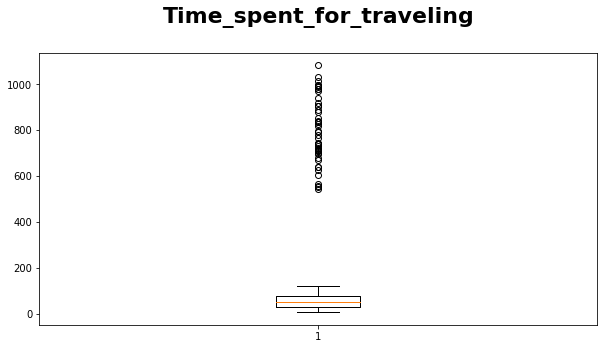

In [ ]:
'Revised'
'> figsize = (20,100) to figsize = (10,5)'
'> fig.add_subplot(Rows,Cols,Position[k]) to fig.add_subplot(1, 1, 1)'

import matplotlib.pyplot as plt

fig = plt.figure(figsize = (10,5))
  # add every single subplot to the figure with a for loop
k = 0
ax = fig.add_subplot(1, 1, 1)
ax.set_title('Time_spent_for_traveling',fontweight="bold", fontsize=22,pad=30)
ax.boxplot(df['Time_spent_for_traveling'])

plt.show()



Box plot to visualize outlier

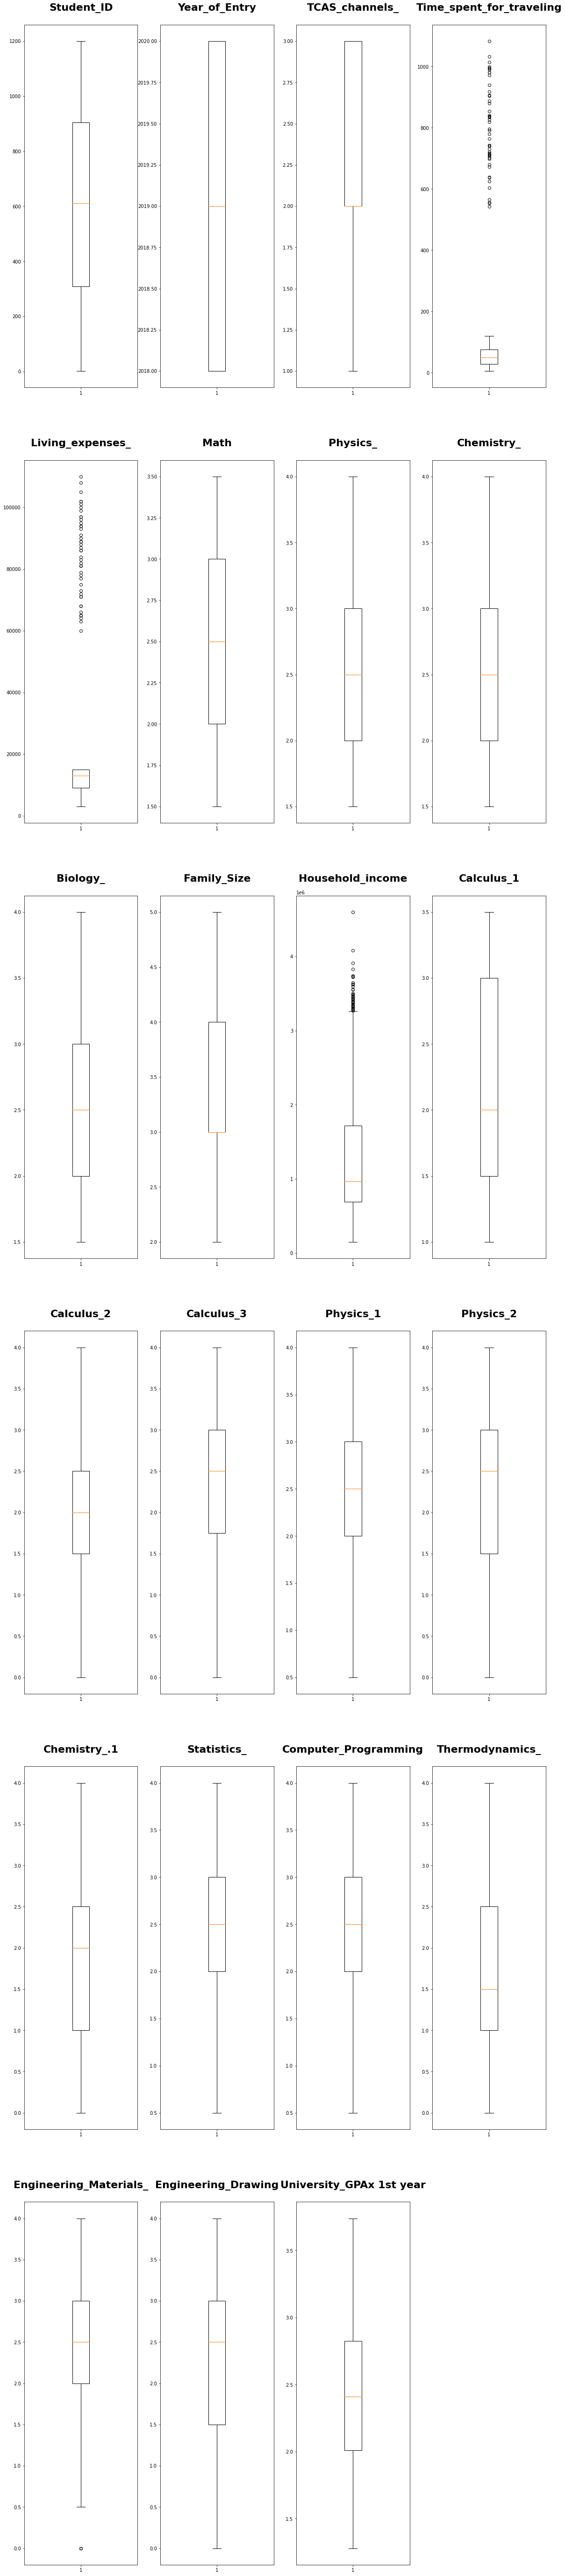

In [ ]:
import matplotlib.pyplot as plt

Tot = count
Cols = 4
# Compute Rows required

Rows = Tot // Cols 

#     EDIT for correct number of rows:
#     If one additional row is necessary -> add one:

if Tot % Cols != 0:
    Rows += 1

# Create a Position index

Position = range(1,Tot + 1)

fig = plt.figure(figsize = (20,100))
for k in range(Tot):

  # add every single subplot to the figure with a for loop

  ax = fig.add_subplot(Rows,Cols,Position[k])
  ax.set_title(name_col[k],fontweight="bold", fontsize=22,pad=30)
  ax.boxplot(df[name_col[k]])

plt.show()



### remove outlier

interquartile range filtering

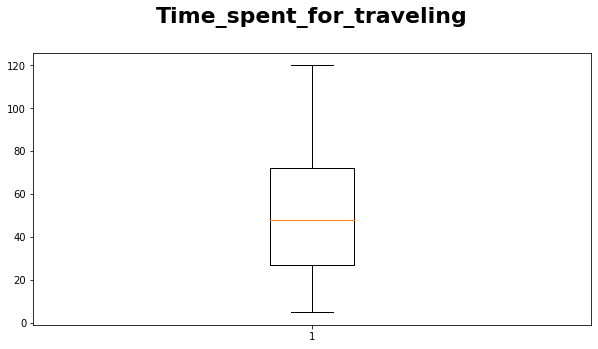

In [ ]:
'Revised by KN'
'Using filtered plot'

df3=df.copy()

Q1 = df3['Time_spent_for_traveling'].quantile(0.25)
Q3 = df3['Time_spent_for_traveling'].quantile(0.75)
IQR = Q3 - Q1    #IQR is interquartile range. 

filter = (df3['Time_spent_for_traveling'] >= Q1 - 1.5 * IQR) & (df3['Time_spent_for_traveling'] <= Q3 + 1.5 *IQR)

df3_filtered = df3.loc[filter]  

#boxplot = df3.boxplot(column=['Time_spent_for_traveling'])
#boxplot = df3_filtered.boxplot(column=['Time_spent_for_traveling'])

import matplotlib.pyplot as plt

fig = plt.figure(figsize = (10,5))
ax = fig.add_subplot(1,1,1)
ax.set_title('Time_spent_for_traveling',fontweight="bold", fontsize=22,pad=30)
ax.boxplot(df3_filtered['Time_spent_for_traveling'])

plt.show()

threshold filtering

In [ ]:
import numpy as np

df2=df.copy()

print('Before remove :',df2.shape)
threshold_Time_spent_for_traveling = np.where(df2['Time_spent_for_traveling'] >= 400)


print(threshold_Time_spent_for_traveling)

''' Removing the Outliers '''
df2.drop(threshold_Time_spent_for_traveling[0], inplace = True)
df2=df2.reset_index(drop=True)

threshold_Living_expenses = np.where(df2['Living_expenses_'] >= 60000)
print(threshold_Living_expenses)
df2.drop(threshold_Living_expenses[0], inplace = True)

df2=df2.reset_index(drop=True)
print('After remove :',df2.shape)

Before remove : (1059, 40)
(array([   7,   14,  107,  159,  186,  226,  245,  256,  269,  280,  314,
        316,  320,  336,  370,  378,  416,  440,  454,  465,  498,  501,
        505,  572,  576,  585,  587,  611,  628,  677,  741,  758,  761,
        774,  775,  802,  821,  826,  832,  852,  853,  889,  904,  954,
        965,  972, 1008, 1009, 1017, 1047, 1055]),)
(array([  7,  17,  53,  77,  93, 121, 231, 244, 254, 265, 318, 320, 388,
       423, 433, 482, 524, 531, 541, 571, 581, 587, 620, 661, 675, 691,
       696, 706, 787, 797, 811, 838, 840, 841, 847, 892, 921, 933, 947,
       950, 988]),)
After remove : (967, 40)


check again

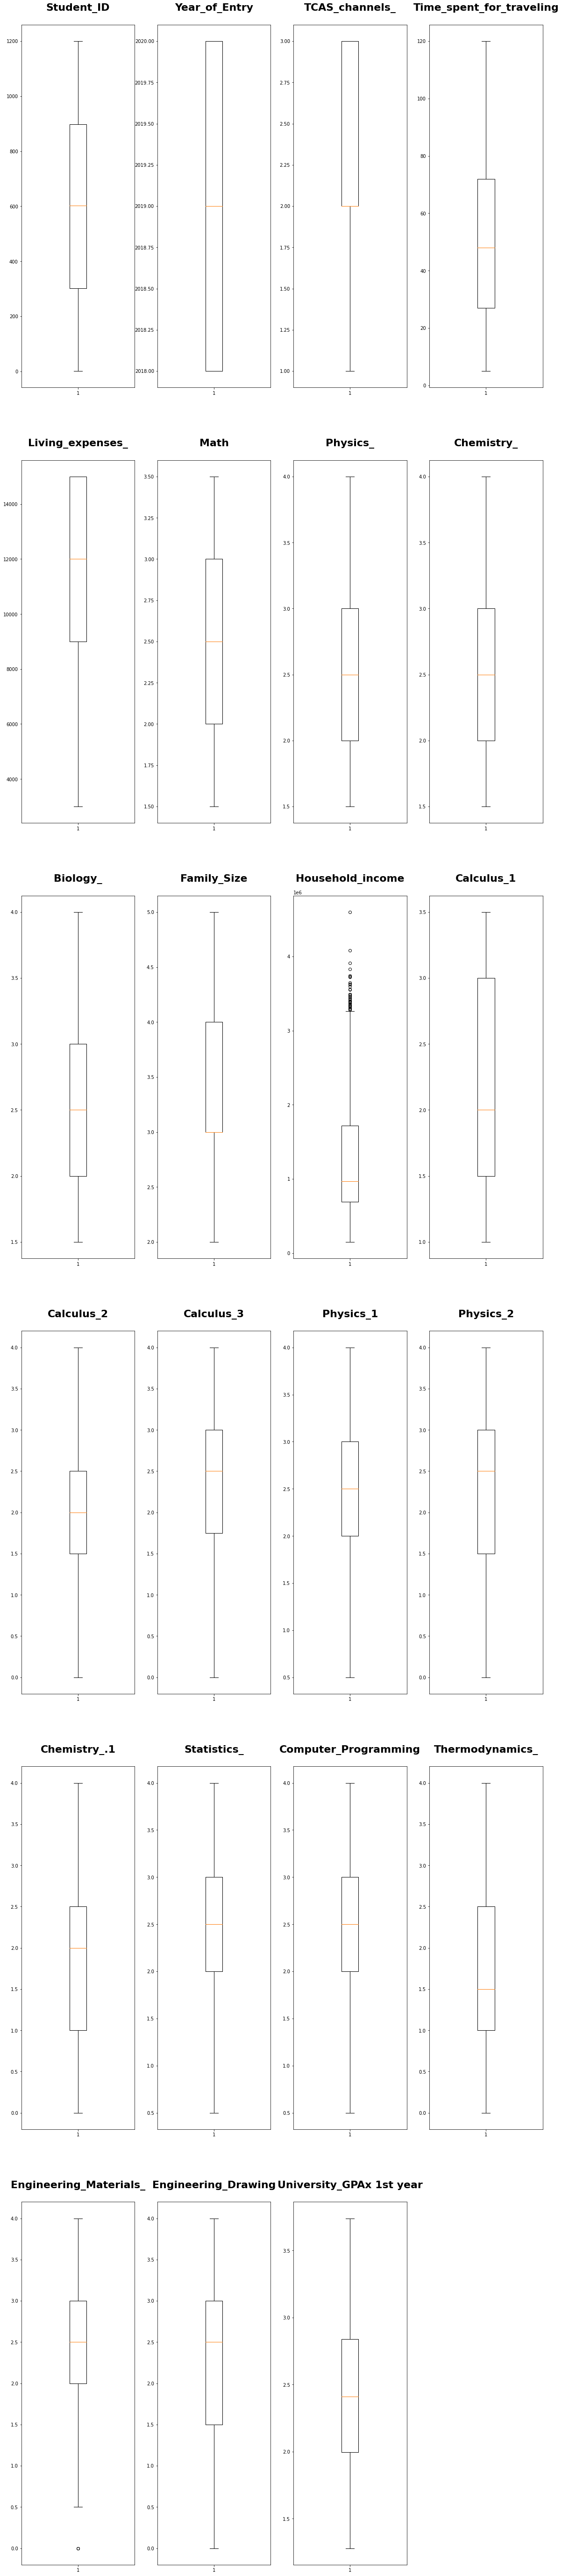

In [ ]:
import matplotlib.pyplot as plt

Tot = count
Cols = 4
# Compute Rows required

Rows = Tot // Cols 

#     EDIT for correct number of rows:
#     If one additional row is necessary -> add one:

if Tot % Cols != 0:
    Rows += 1

# Create a Position index

Position = range(1,Tot + 1)

fig = plt.figure(figsize = (20,100))
for k in range(Tot):

  # add every single subplot to the figure with a for loop

  ax = fig.add_subplot(Rows,Cols,Position[k])
  ax.set_title(name_col[k],fontweight="bold", fontsize=22,pad=30)
  ax.boxplot(df2[name_col[k]])

plt.show()



update data

In [ ]:
df=df2.copy()
print(df)

     Student_ID  Year_of_Entry  TCAS_channels_ Hometown REGION Address_Type  \
0             1         2020.0             3.0               S        Urban   
1             2         2020.0             3.0             BKK        Urban   
2             3         2020.0             3.0             BKK        Urban   
3             4         2020.0             1.0             BKK        Urban   
4             6         2020.0             3.0               S        Urban   
..          ...            ...             ...             ...          ...   
962        1194         2018.0             2.0             BKK        Urban   
963        1195         2018.0             2.0             BKK        Urban   
964        1197         2018.0             2.0             BKK        Urban   
965        1199         2018.0             2.0             BKK        Urban   
966        1200         2018.0             3.0               S        Urban   

    Where_to_stay  Time_spent_for_traveling Interne

## Inconsistency

filter feature with text or object

In [ ]:
count =  0
name_col = []
for col in range(len(df.columns)):
  if df.dtypes[col] != 'float64' and df.dtypes[col] !='int64' : 
    print(df.columns[col],df.dtypes[col])
    count += 1
    name_col.append(df.columns[col])
print('total column :',count)
print(name_col)

Hometown REGION object
Address_Type object
Where_to_stay object
InternetAccess_at_Home object
Type_of_prior_school object
Prior_School_Province REGION object
School name object
Stay_with object
Family_status object
Father_Education object
Mother_Education object
guardian object
mother's_job object
father's_job object
Scholarship : Excellent Performance object
Scholarship : Financial Aid object
Participation_on_Activities object
total column : 17
['Hometown REGION', 'Address_Type', 'Where_to_stay', 'InternetAccess_at_Home', 'Type_of_prior_school', 'Prior_School_Province REGION', 'School name', 'Stay_with', 'Family_status', 'Father_Education', 'Mother_Education', 'guardian', "mother's_job", "father's_job", 'Scholarship : Excellent Performance', 'Scholarship : Financial Aid', 'Participation_on_Activities']


In [ ]:
'Revised'
'Not include Catagory datatype'

text_columns = data.dtypes[data.dtypes == "object"].index.values.tolist()
text_columns


['Gender',
 'Years_Living_in_BKK',
 'Hometown REGION',
 'Address_Type',
 'Where_to_stay',
 'InternetAccess_at_Home',
 'Type_of_prior_school',
 'Prior_School_Province REGION',
 'School name',
 'Stay_with',
 'Family_status',
 'Father_Education',
 'Mother_Education',
 'guardian',
 "mother's_job",
 "father's_job",
 'Scholarship : Excellent Performance',
 'Scholarship : Financial Aid',
 'Participation_on_Activities']

check inconsistencies

In [ ]:
# get all the unique values in the column
for k in range(count) :
  df2 = df[name_col[k]].unique()
  try:
    df2.sort()
  except:
    pass
# sort them alphabetically and then take a closer look
  print(name_col[k],df2)

Hometown REGION ['BKK' 'E' 'N' 'NE' 'S']
Address_Type ['Rural' 'Urban']
Where_to_stay ['Apartment' 'H me' 'Ho me' 'Hom e' 'Home' 'Home.']
InternetAccess_at_Home ['Mobile' 'W ifi' 'W1fi' 'WIFI' 'WOFO' 'Wi fi' 'Wi-fi' 'Wi.fi' 'Wif1'
 'Wifi' 'wIFI']
Type_of_prior_school ['AAA' 'Abroad' 'High School' 'Vocational School']
Prior_School_Province REGION ['BKK' 'E' 'N' 'NE' 'S']
School name ['BKK1' 'BKK10' 'BKK2' 'BKK3' 'BKK4' 'BKK5' 'BKK6' 'BKK7' 'BKK8' 'BKK9'
 'E1' 'E10' 'E2' 'E3' 'E4' 'E5' 'E6' 'E7' 'E8' 'E9' 'N2' 'N7' 'N8' 'NE1'
 'NE10' 'NE2' 'NE4' 'NE5' 'NE6' 'NE7' 'NE8' 'NE9' 'S1' 'S10' 'S2' 'S3'
 'S4' 'S5' 'S6' 'S7' 'S8' 'S9']
Stay_with ['Alone' 'Mom or Dad' 'Parents' 'Relatives' 'Roommates']
Family_status ['Apart' 'Together']
Father_Education ['Bachelor' 'Doctoral' 'High School' 'Master' 'Primary' 'Vocational']
Mother_Education ['Bachelor' 'Doctoral' 'High School' 'Master' 'Primary' 'Vocational']
guardian ['Father' 'Mother']
mother's_job ['Business' 'Freelance' 'Private' 'Public']
fathe

In [ ]:
#InternetAccess_at_Home have letter inconsitency problem
#Use lower case to fix
# Lower InternetAccess_at_Home column
df2=df.copy()
df2['InternetAccess_at_Home'] = df2['InternetAccess_at_Home'].str.lower()
# Verify changes have been effected
print(df2['InternetAccess_at_Home'].unique())

df=df2.copy()


['wifi' 'mobile' 'wi fi' 'wi-fi' 'w ifi' 'wi.fi' 'wofo' 'w1fi' 'wif1']


remove space

In [ ]:
#InternetAccess_at_Home have letter inconsitency problem
#Use lower case to fix
# Lower InternetAccess_at_Home column
df2=df.copy()
df2['InternetAccess_at_Home'] = df2['InternetAccess_at_Home'].str.replace(' ', '')
df2['Where_to_stay'] = df2['Where_to_stay'].str.replace(' ', '')
# Verify changes have been effected
print(df2['InternetAccess_at_Home'].unique())
print(df2['Where_to_stay'].unique())

df=df2.copy()


['wifi' 'mobile' 'wi-fi' 'wi.fi' 'wofo' 'w1fi' 'wif1']
['Apartment' 'Home' 'Hme' 'Home.']


remove dot

In [ ]:
#InternetAccess_at_Home have letter inconsitency problem
#Use lower case to fix
# Lower InternetAccess_at_Home column
df2=df.copy()
df2['InternetAccess_at_Home'] = df2['InternetAccess_at_Home'].str.replace('.', '')
df2['Where_to_stay'] = df2['Where_to_stay'].str.replace('.', '')
# Verify changes have been effected
print(df2['InternetAccess_at_Home'].unique())
print(df2['Where_to_stay'].unique())

df=df2.copy()

['wifi' 'mobile' 'wi-fi' 'wofo' 'w1fi' 'wif1']
['Apartment' 'Home' 'Hme']


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  """
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  


remove unwant symbol or alphabet

In [ ]:
#InternetAccess_at_Home have letter inconsitency problem
#Use lower case to fix
# Lower InternetAccess_at_Home column
df2=df.copy()
df2['InternetAccess_at_Home'] = df2['InternetAccess_at_Home'].str.replace('-', '')
# Verify changes have been effected
print(df2['InternetAccess_at_Home'].unique())

df=df2.copy()

['wifi' 'mobile' 'wofo' 'w1fi' 'wif1']


remove miss spelling

In [ ]:
#InternetAccess_at_Home have letter inconsitency problem
#Use lower case to fix
# Lower InternetAccess_at_Home column
df2=df.copy()
df2['InternetAccess_at_Home'] = df2['InternetAccess_at_Home'].str.replace('wofo', 'wifi')
df2['Where_to_stay'] = df2['Where_to_stay'].str.replace('Hme', 'Home')
# Verify changes have been effected
print(df2['Where_to_stay'].unique())
print(df2['InternetAccess_at_Home'].unique())

df=df2.copy()

['Apartment' 'Home']
['wifi' 'mobile' 'w1fi' 'wif1']


In [ ]:
#InternetAccess_at_Home have letter inconsitency problem
#Use lower case to fix
# Lower InternetAccess_at_Home column
df2=df.copy()
df2['InternetAccess_at_Home'] = df2['InternetAccess_at_Home'].str.replace('w1fi', 'wifi')
# Verify changes have been effected
print(df2['InternetAccess_at_Home'].unique())


df=df2.copy()

['wifi' 'mobile' 'wif1']


In [ ]:
#InternetAccess_at_Home have letter inconsitency problem
#Use lower case to fix
# Lower InternetAccess_at_Home column
df2=df.copy()
df2['InternetAccess_at_Home'] = df2['InternetAccess_at_Home'].str.replace('wif1', 'wifi')
# Verify changes have been effected
print(df2['InternetAccess_at_Home'].unique())

df=df2.copy()

['wifi' 'mobile']


Downcasting dataframe


*   Useful for very large dataset
*   Efficient memory usage



In [ ]:
'Revised'
df_ = data.copy()

df_['Address_Type'] = df_['Address_Type'].astype('category')
df_['Calculus_1'] = df_['Calculus_1'].astype('float16')

#data['Address_Type'].unique()
#data['Calculus_1'].unique()

# Convert Yes/No to 1/0
df_['Scholarship : Excellent Performance'] = (df_['Scholarship : Excellent Performance'] == 'Yes').astype(int)
df_['Scholarship : Financial Aid'] = (df_['Scholarship : Financial Aid'] == 'Yes').astype(int)
#df_['Scholarship : Excellent Performance'].unique()
df_.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1222 entries, 0 to 1221
Data columns (total 43 columns):
 #   Column                               Non-Null Count  Dtype   
---  ------                               --------------  -----   
 0   Student_ID                           1222 non-null   int64   
 1   Year_of_Entry                        1100 non-null   float64 
 2   TCAS_channels_                       1151 non-null   float64 
 3   Gender                               1149 non-null   object  
 4   Age                                  1159 non-null   float64 
 5   Years_Living_in_BKK                  1175 non-null   object  
 6   Hometown REGION                      1152 non-null   object  
 7   Address_Type                         1162 non-null   category
 8   Where_to_stay                        1159 non-null   object  
 9   Time_spent_for_traveling             1222 non-null   int64   
 10  InternetAccess_at_Home               1222 non-null   object  
 11  Living_expenses_ 

## Normalization of data

In [ ]:
count =  0
name_col = []
for col in range(len(df.columns)):
  if df.dtypes[col] == 'float64' or df.dtypes[col] =='int64' : 
    print(df.columns[col],df.dtypes[col])
    count += 1
    name_col.append(df.columns[col])
print('total column :',count)
print(name_col)

Z-Score normalization

In [ ]:
df2=df.copy()
normalized_df =df2.copy()

for k in range(count) :
  try:
    normalized_df[name_col[k]]=(df2[name_col[k]]-df2[name_col[k]].mean())/df2[name_col[k]].std()
    print(f'{[name_col[k]]},max:{normalized_df[name_col[k]].max()} , min :{normalized_df[name_col[k]].min()}')
  except:
    pass

print(normalized_df)

df2 = normalized_df.copy()

max-min 0..1 normalization

In [ ]:
df2=df.copy()
normalized_df =df2.copy()

for k in range(count) :
  try:
    normalized_df[name_col[k]]=(df2[name_col[k]]-df2[name_col[k]].min())/(df2[name_col[k]].max()-df2[name_col[k]].min())
    print(f'{[name_col[k]]},max:{normalized_df[name_col[k]].max()} , min :{normalized_df[name_col[k]].min()}')
  except:
    pass

print(normalized_df)

df2 = normalized_df.copy()

In [ ]:
df3=df.copy()
normalized_df =df3.copy()

for k in normalized_df:
  print(normalized_df[k])

#print(normalized_df)

In [ ]:
df2

#2. Data Visualization

In [ ]:
import pandas as pd
df = pd.read_csv('https://raw.githubusercontent.com/charmy2525/DataAnalytics/main/Data%20analytics%20course%20data%20set%20-%20student%20academic%20performance%20-%20data.csv')

In [ ]:
df

,Student_ID,Year_of_Entry,TCAS_channels_,Gender,Age,Years_Living_in_BKK,Hometown REGION,Address_Type,Where_to_stay,Time_spent_for_traveling,...,Chemistry_.1,Statistics_,Computer_Programming,Thermodynamics_,Engineering_Materials_,Engineering_Drawing,University_GPAx 1st year,Scholarship : Excellent Performance,Scholarship : Financial Aid,Participation_on_Activities
0,1,2020,3,Female,18,0,S,Urban,Apartment,36,...,1.5,2.0,1.5,0.0,1.0,2.0,1.78,No,No,Medium
1,2,2020,3,Male,18,18,BKK,Urban,Home,5,...,3.5,3.5,2.5,4.0,3.0,1.0,2.86,No,No,No
2,3,2020,3,Male,18,18,BKK,Urban,Apartment,76,...,2.5,3.0,4.0,3.0,2.5,2.0,3.20,No,No,No
3,4,2020,1,Male,18,3,BKK,Urban,Home,77,...,1.5,2.5,2.0,2.0,1.5,2.0,2.20,No,No,Medium
4,5,2020,2,Female,18,18,BKK,Urban,Home,71,...,1.0,2.5,1.5,1.5,2.5,3.0,2.19,No,No,High
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1195,1196,2018,3,Female,18,0,S,Urban,Apartment,17,...,4.0,3.5,3.0,2.0,4.0,2.5,3.23,No,No,High
1196,1197,2018,2,Female,18,18,BKK,Urban,Home,23,...,1.0,2.0,2.0,3.0,2.0,2.0,2.01,No,No,Medium
1197,1198,2018,2,Female,18,0,S,Rural,Apartment,26,...,1.0,3.0,2.0,1.0,3.0,1.5,2.06,No,No,Medium
1198,1199,2018,2,Female,19,19,BKK,Urban,Apartment,50,...,2.0,2.5,1.5,1.5,1.0,2.5,1.93,No,No,Medium


In [ ]:
#!pip install statsmodels

In [ ]:
for col in df.columns:
    print(col)
    print(type(df[col][1]))

Student_ID
<class 'numpy.int64'>
Year_of_Entry
<class 'numpy.int64'>
TCAS_channels_
<class 'numpy.int64'>
Gender
<class 'str'>
Age
<class 'numpy.int64'>
Years_Living_in_BKK
<class 'numpy.int64'>
Hometown REGION
<class 'str'>
Address_Type
<class 'str'>
Where_to_stay
<class 'str'>
Time_spent_for_traveling
<class 'numpy.int64'>
InternetAccess_at_Home
<class 'str'>
Living_expenses_
<class 'numpy.int64'>
Type_of_prior_school
<class 'str'>
Prior_School_Province REGION
<class 'str'>
School name
<class 'str'>
Math
<class 'numpy.float64'>
Physics_
<class 'numpy.float64'>
Chemistry_
<class 'numpy.float64'>
Biology_
<class 'numpy.float64'>
Family_Size
<class 'numpy.int64'>
Stay_with
<class 'str'>
Family_status
<class 'str'>
Father_Education
<class 'str'>
Mother_Education
<class 'str'>
guardian
<class 'str'>
mother's_job
<class 'str'>
father's_job
<class 'str'>
Household_income
<class 'numpy.int64'>
Calculus_1
<class 'numpy.float64'>
Calculus_2
<class 'numpy.float64'>
Calculus_3
<class 'numpy.floa

In [ ]:
from scipy import stats
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

alpha= 0.05

rvs1 = df[(df.Year_of_Entry == 2020)]
rvs2 = df[(df.Year_of_Entry == 2019)]
data1 = rvs1.Calculus_1.astype(float)
data2 = rvs2.Calculus_1.astype(float)

#print(data1)
#print(data2)

data1.index = pd.RangeIndex(start=0, stop=0+len(data1), step=1)
data2.index = pd.RangeIndex(start=0, stop=0+len(data2), step=1)

#print(data1)
#print(data2)

print('data1 mean = ',data1.mean())
print('data2 mean = ',data2.mean())

print('data1 sd = ',data1.std())
print('data2 sd = ',data2.std())

print('data1 descriptive = ',data1.describe())
print('data2 descriptive = ',data2.describe())

data1 mean =  2.2668539325842696
data2 mean =  2.2131782945736433
data1 sd =  0.6066506440747609
data2 sd =  0.6639550024894479
data1 descriptive =  count    356.000000
mean       2.266854
std        0.606651
min        1.000000
25%        1.500000
50%        2.500000
75%        3.000000
max        3.500000
Name: Calculus_1, dtype: float64
data2 descriptive =  count    387.000000
mean       2.213178
std        0.663955
min        1.000000
25%        1.500000
50%        2.000000
75%        3.000000
max        3.500000
Name: Calculus_1, dtype: float64


Histogram

<BarContainer object of 10 artists>

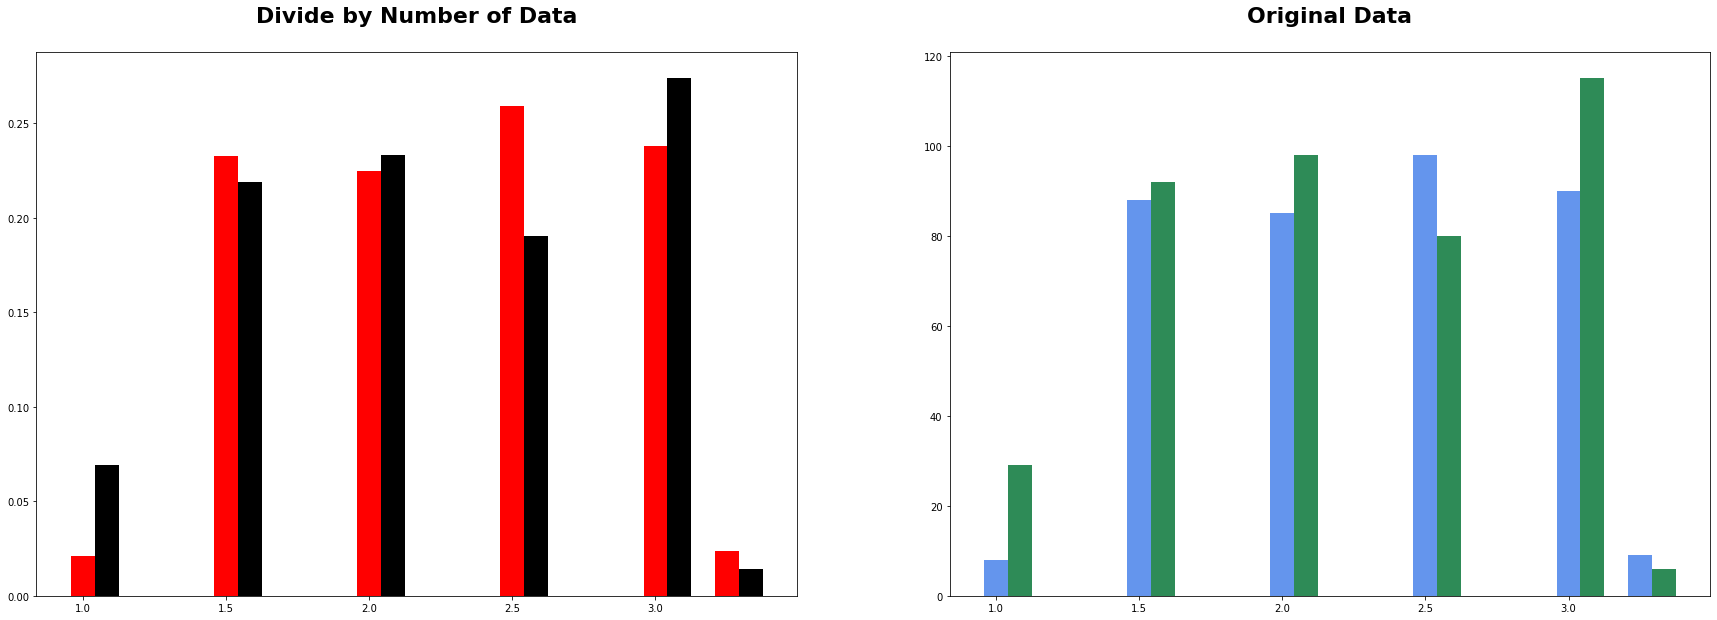

In [ ]:

#import seaborn
#seaborn.set(style='ticks')

fig = plt.figure(figsize = (30,10))
ax = fig.add_subplot(121)
bx = fig.add_subplot(122)

ax.set_title('Divide by Number of Data',fontweight="bold", fontsize=22,pad=30)
bx.set_title('Original Data',fontweight="bold", fontsize=22,pad=30)

a_heights, a_bins = np.histogram(data1)
b_heights, b_bins = np.histogram(data2, bins=a_bins)

width = (a_bins[1] - a_bins[0])/3

ax.bar(a_bins[:-1], a_heights/len(data1), width=width, facecolor='red')
ax.bar(b_bins[:-1]+width, b_heights/len(data2), width=width, facecolor='black')

bx.bar(a_bins[:-1], a_heights, width=width, facecolor='cornflowerblue')
bx.bar(b_bins[:-1]+width, b_heights, width=width, facecolor='seagreen')



Comparing two population (Multi distribution)

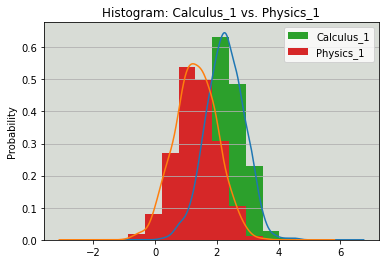

In [ ]:
means = df.Calculus_1.mean(), df.Physics_1.mean()
stdevs = mean = df.Calculus_1.std(), df.Physics_1.std()

dist = pd.DataFrame(np.random.normal(loc=means, scale=stdevs, size=(df.shape[0], 2)), columns=['Calculus_1', 'Physics_1'])
dist.agg(['min', 'max', 'mean', 'std']).round(decimals=4)

fig, ax = plt.subplots()
dist.plot.kde(ax=ax, legend=False, title='Histogram: Calculus_1 vs. Physics_1')
dist.plot.hist(density=True, ax=ax)
ax.set_ylabel('Probability')
ax.grid(axis='y')
ax.set_facecolor('#d8dcd6')

PIE Chart

Remove data with 0

In [ ]:
'''
b = a_heights
print(b,type(b))
print(a_bins)

b1 =[]
c1 =[]
for i in range(len(b)):
  print(b[i])
  if b[i] != 0 :
    b1.append(b[i])
    c1.append(a_bins[i])
  print(b1)
  print(c1)

a_heights = np.array(b1)
a_bins = np.array(c1)

print("a_heights = ",a_heights,type(a_heights))
print("a_bins = ",a_bins)

b = b_heights
print(b,type(b))
print(b_bins)

b1 =[]
c1 =[]
for i in range(len(b)):
  print(b[i])
  if b[i] != 0 :
    b1.append(b[i])
    c1.append(b_bins[i])
  print(b1)
  print(c1)

b_heights = np.array(b1)
b_bins = np.array(c1)

print("a_heights = ",b_heights,type(b_heights))
print("a_bins = ",b_bins)
'''

In [ ]:
' Revised by Krisanarach / change for loop to enumerate'

b = a_heights
print(b,type(b))
print(a_bins)

b1, c1 =[], []

for i, j in enumerate(b):
    print(j)
    if j != 0 :
      b1.append(j)
      c1.append(a_bins[i])
    print(b1)
    print(c1)

a_heights = np.array(b1)
a_bins = np.array(c1)

print("a_heights = ",a_heights,type(a_heights))
print("a_bins = ",a_bins)

b = b_heights
print(b,type(b))
print(b_bins)

b1, c1 =[], []

for i, j in enumerate(b):
    print(j)
    if j != 0 :
      b1.append(j)
      c1.append(b_bins[i])
    print(b1)
    print(c1)

b_heights = np.array(b1)
b_bins = np.array(c1)

print("a_heights = ",b_heights,type(b_heights))
print("a_bins = ",b_bins)

In [ ]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas

fig = plt.figure(figsize = (30,10))
ax = fig.add_subplot(121)
bx = fig.add_subplot(122)

ax.set_title('2020',fontweight="bold", fontsize=22,pad=30)
bx.set_title('2019',fontweight="bold", fontsize=22,pad=30)

a_bins[-1]=4
b_bins[-1]=4

ax.pie(a_heights/len(data1),labels=a_bins)
bx.pie(b_heights/len(data2),labels=b_bins)

Box Plots

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="ticks")
%matplotlib inline

newdata = pd.Series(data1, name="2020 Calculus1").to_frame().join(pd.Series(data2, name="2019 Calculus1"))
sns.boxplot(data=newdata, width = 0.2) 


Violin Plot

In [ ]:
sns.catplot(
    data=newdata, width = 0.2, kind="violin",
)

Pareto Chart

In [ ]:
from matplotlib.ticker import PercentFormatter
datacolumn='Household_income'
df2 = df.sort_values(by=datacolumn,ascending=False)
df2["cumpercentage"] = df2[datacolumn].cumsum()*100/df2[datacolumn].sum()

df2.index = df2[datacolumn]

fig = plt.figure(figsize = (30,10))
ax = fig.add_subplot(121)

ax.set_title(datacolumn,fontweight="bold", fontsize=22,pad=30)

p_heights, p_bins = np.histogram(df2[datacolumn])

width = (p_bins[1] - p_bins[0])/3
p_heights1=p_heights[::-1]
p_bins1=p_bins[::-1]
p_cumsum  = (p_heights1*p_bins1[:-1]).cumsum()*100/(p_heights1*p_bins1[:-1]).sum()

ax.bar(p_bins1[:-1], p_heights1*p_bins1[:-1], width=width, facecolor='red')
#print(p_heights1,p_bins1,)
ax.invert_xaxis()


#print(p_bins1,p_cumsum)


In [ ]:
fig = plt.figure(figsize = (30,10))
ax = fig.add_subplot(121)

ax.bar(p_bins1[:-1], p_heights1*p_bins1[:-1], width=width, facecolor='red')
ax2 = ax.twinx()
px = np.insert(p_bins1,0,p_bins1[0]+width)
py = np.insert(p_cumsum,0,0)

#print(px[:-1],py)
ax2.plot(px[:-1], py, color="C1", marker="D", ms=0.1)
ax2.yaxis.set_major_formatter(PercentFormatter())
ax2.invert_xaxis()
ax2.set_ylim(0,100)

ax.tick_params(axis="y", colors="C0")
ax2.tick_params(axis="y", colors="C1")
plt.show()

In [ ]:
fig, ax = plt.subplots()
ax.bar(df2.index,height= df2[datacolumn], color="C0", width = 100000)
ax2 = ax.twinx()
ax2.plot(df2[datacolumn], df2["cumpercentage"], color="C1", marker="D", ms=0.1)
ax2.yaxis.set_major_formatter(PercentFormatter())

ax.tick_params(axis="y", colors="C0")
ax2.tick_params(axis="y", colors="C1")
ax2.invert_xaxis()
plt.show()

T-Test

In [ ]:
#Histogram
#import seaborn
#seaborn.set(style='ticks')

fig = plt.figure(figsize = (30,10))
ax = fig.add_subplot(121)
bx = fig.add_subplot(122)

ax.set_title('Divide by Number of Data',fontweight="bold", fontsize=22,pad=30)
bx.set_title('Original Data',fontweight="bold", fontsize=22,pad=30)

a_heights, a_bins = np.histogram(data1)
b_heights, b_bins = np.histogram(data2, bins=a_bins)

width = (a_bins[1] - a_bins[0])/3

ax.bar(a_bins[:-1], a_heights/len(data1), width=width, facecolor='red')
ax.bar(b_bins[:-1]+width, b_heights/len(data2), width=width, facecolor='black')

bx.bar(a_bins[:-1], a_heights, width=width, facecolor='cornflowerblue')
bx.bar(b_bins[:-1]+width, b_heights, width=width, facecolor='seagreen')



In [ ]:
stats.ttest_ind(data1, data2,equal_var=False)
pv=stats.ttest_ind(data1, data2).pvalue
print('p-value = ',pv)
if (stats.ttest_ind(data1, data2).pvalue>=alpha) :
  {
      print("can not reject H0")
  }
else :
  {
      print("reject H0") 
  }


#3. Linear Regression Model

In [1]:
# imports
import pandas as pd
import numpy as np
df = pd.read_csv('https://raw.githubusercontent.com/charmy2525/DataAnalytics/main/Data%20analytics%20course%20data%20set%20-%20student%20academic%20performance%20-%20data.csv')

import matplotlib.pyplot as plt

# this allows plots to appear directly in the notebook
%matplotlib inline

# visualize the relationship between the features and the response using scatterplots
data_X = df['Math']
data_Y = df['Calculus_1']

data_X = data_X.astype(float)
data_Y = data_Y.astype(float)

area = pd.DataFrame(data_X)
area.iloc[:] = 0
print(area)
print(len(data_X))
print(area.iloc[0])
for i in range(len(data_X)):
  for j in range(i):
    if (data_X.iloc[i]==data_X.iloc[j]) and (data_Y.iloc[i]==data_Y.iloc[j]):
      area.iloc[j] +=1
print(area)

      Math
0      0.0
1      0.0
2      0.0
3      0.0
4      0.0
...    ...
1195   0.0
1196   0.0
1197   0.0
1198   0.0
1199   0.0

[1200 rows x 1 columns]
1200
Math    0.0
Name: 0, dtype: float64
       Math
0      54.0
1      91.0
2      90.0
3     124.0
4      53.0
...     ...
1195    0.0
1196    1.0
1197    0.0
1198    0.0
1199    0.0

[1200 rows x 1 columns]


Bubble Chart

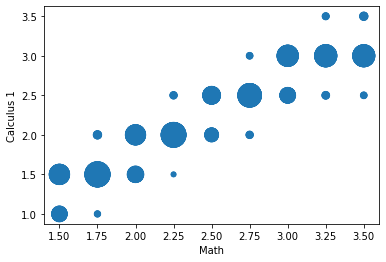

In [2]:
# initialize list of lists
  
plt.scatter(data_X,data_Y,s=area*5)
plt.xlabel("Math")
plt.ylabel("Calculus 1")
# show the plot
plt.show()


Single Variable Linear Regression

In [3]:
# Split the targets into training/testing sets
y_train = data_Y[int(len(data_Y)*0.2)+1:]
y_test = data_Y[0:int(len(data_Y)*0.2)]

data_X =df['Math']
x_train = data_X[int(len(data_Y)*0.2)+1:]
x_test = data_X[0:int(len(data_Y)*0.2)]

'''
# Add index value
x_train = [[i, x] for i, x in enumerate(x_train)]
y_train = [[i, y] for i, y in enumerate(y_train)]
x_test = [[i, x] for i, x in enumerate(x_test)]
y_test = [[i, y] for i, y in enumerate(y_test)]
'''

x_train_arr = np.array(x_train)
y_train_arr = np.array(y_train)
x_test_arr = np.array(x_test)
y_test_arr = np.array(y_test)

'''
print(x_train_arr)
print(type(x_train_arr))
'''

'\nprint(x_train_arr)\nprint(type(x_train_arr))\n'

Linear Regression Line

Coefficients: 
 0.9238876859522688
Interception: 
 -0.05682966343671003
equation: Calculus_1 =  0.9238876859522688 Math +  -0.05682966343671003
Coefficient of determination: 0.86
R2-Adj: 0.86


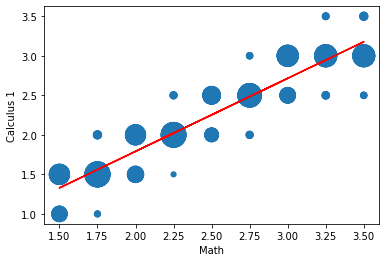

In [4]:
# Create linear regression object
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(x_train_arr[:, np.newaxis], y_train_arr)

# The coefficients
print("Coefficients: \n", lm.coef_[0])
print("Interception: \n",lm.intercept_)
print("equation: Calculus_1 = ",lm.coef_[0],"Math + ",lm.intercept_)


# Make predictions using the testing set
y_pred = lm.predict(x_test_arr[:, np.newaxis])



# The coefficient of determination: 1 is perfect prediction
print("Coefficient of determination: %.2f" % lm.score(x_test_arr[:, np.newaxis], y_test_arr))
Adj_r2 = 1 - (1-lm.score(x_test_arr[:, np.newaxis], y_test_arr)) * (len(y_test_arr)-1)/(len(y_test_arr)-x_test_arr.ndim-1)
print("R2-Adj: %.2f" % Adj_r2)
# Plot outputs
plt.scatter(data_X,data_Y,s=area*5)
plt.plot(x_test_arr, y_pred,color="red");
plt.xlabel("Math")
plt.ylabel("Calculus 1")
plt.show()

Multiple Variable Linear Regression

In [5]:
# Split the targets into training/testing sets
y_train = data_Y[int(len(data_Y)*0.2)+1:]
y_test = data_Y[0:int(len(data_Y)*0.2)]

data_X =df[['Math','Physics_']]
x_train = data_X[int(len(data_Y)*0.2)+1:]
x_test = data_X[0:int(len(data_Y)*0.2)]

'''
# Add index value
x_train = [[i, x] for i, x in enumerate(x_train)]
y_train = [[i, y] for i, y in enumerate(y_train)]
x_test = [[i, x] for i, x in enumerate(x_test)]
y_test = [[i, y] for i, y in enumerate(y_test)]
'''

x_train_arr = np.array(x_train)
y_train_arr = np.array(y_train)
x_test_arr = np.array(x_test)
y_test_arr = np.array(y_test)


#print(x_train_arr)
#print(type(x_train_arr))

from sklearn.linear_model import LinearRegression

lm = LinearRegression()
lm.fit(x_train_arr, y_train_arr)
# The coefficients
print("Coefficients: \n", lm.coef_)
print("Interception: \n",lm.intercept_)

equation = "equation: Calculus_1 = "
equation_round = "equation_round: Calculus_1 = "

for i in range(len(data_X.columns)):
  equation = equation+str(lm.coef_[i])+data_X.columns[i]
  equation_round = equation_round+str(round(lm.coef_[i],2))+data_X.columns[i]
  try:
    if lm.coef_[i+1] > 0 :
      equation = equation+"+"
      equation_round = equation_round+"+"
  except:
    pass
if lm.intercept_ > 0 : 
  equation = equation+"+"
  equation_round = equation_round+"+"
equation = equation+str(lm.intercept_)
equation_round = equation_round+str(round(lm.intercept_,2))
print(equation)
print(equation_round)

#print("equation: Calculus_1 = ",lm.coef_[0],"Math + ",lm.intercept_)
#print(data_X.columns[0])

# Make predictions using the testing set
y_pred = lm.predict(x_test_arr)



# The coefficient of determination: 1 is perfect prediction
print("Coefficient of determination: %.2f" % lm.score(x_test_arr, y_test_arr))
Adj_r2 = 1 - (1-lm.score(x_test_arr, y_test_arr)) * (len(y_test_arr)-1)/(len(y_test_arr)-x_test_arr.ndim-1)
print("R2-Adj: %.2f" % Adj_r2)

Coefficients: 
 [ 0.93499506 -0.0138803 ]
Interception: 
 -0.04905344933310385
equation: Calculus_1 = 0.9349950607844888Math-0.013880299277194414Physics_-0.04905344933310385
equation_round: Calculus_1 = 0.93Math-0.01Physics_-0.05
Coefficient of determination: 0.86
R2-Adj: 0.86


Heat Map

                          Student_ID  Year_of_Entry  TCAS_channels_       Age  \
Student_ID                  1.000000      -0.942447       -0.019644 -0.097562   
Year_of_Entry              -0.942447       1.000000        0.021271  0.080549   
TCAS_channels_             -0.019644       0.021271        1.000000  0.010050   
Age                        -0.097562       0.080549        0.010050  1.000000   
Years_Living_in_BKK         0.062417      -0.070392       -0.309813  0.024513   
Time_spent_for_traveling    0.005276      -0.007538        0.020445  0.060675   
Living_expenses_           -0.039519       0.063637       -0.006263  0.029170   
Math                       -0.017362       0.029794       -0.139004  0.010290   
Physics_                   -0.014167       0.026691       -0.105105  0.029730   
Chemistry_                 -0.036297       0.039400       -0.095317  0.011158   
Biology_                   -0.036177       0.040332       -0.066196  0.002520   
Family_Size                -

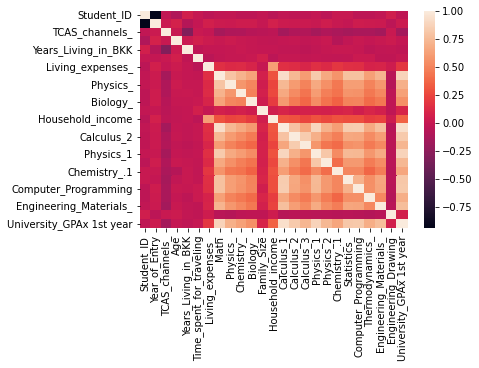

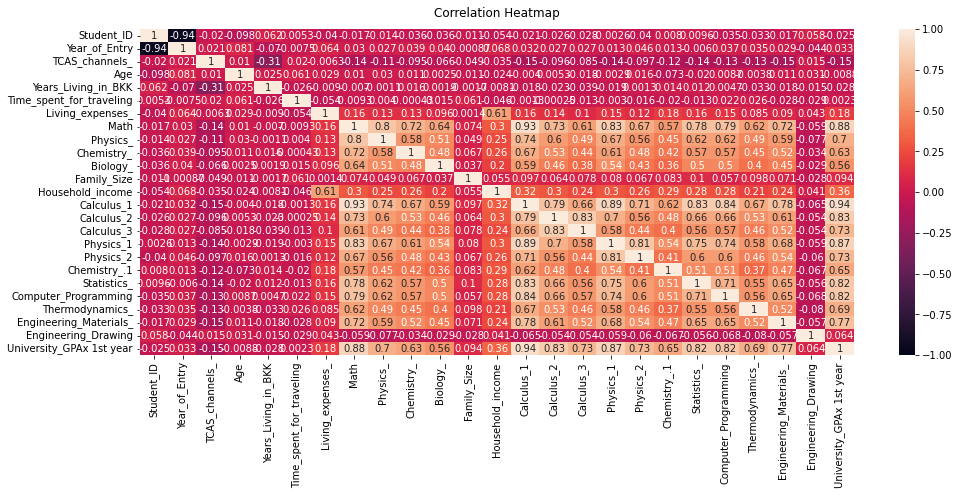

In [6]:
# imports
import pandas as pd
import numpy as np
import seaborn as sns
df = pd.read_csv('https://raw.githubusercontent.com/charmy2525/DataAnalytics/main/Data%20analytics%20course%20data%20set%20-%20student%20academic%20performance%20-%20data.csv')


correlation_matrix = df.corr()
print(correlation_matrix)
sns.heatmap(correlation_matrix);
plt.figure(figsize=(16, 6))
heatmap = sns.heatmap(correlation_matrix, vmin=-1, vmax=1, annot=True)
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12);


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  """Entry point for launching an IPython kernel.


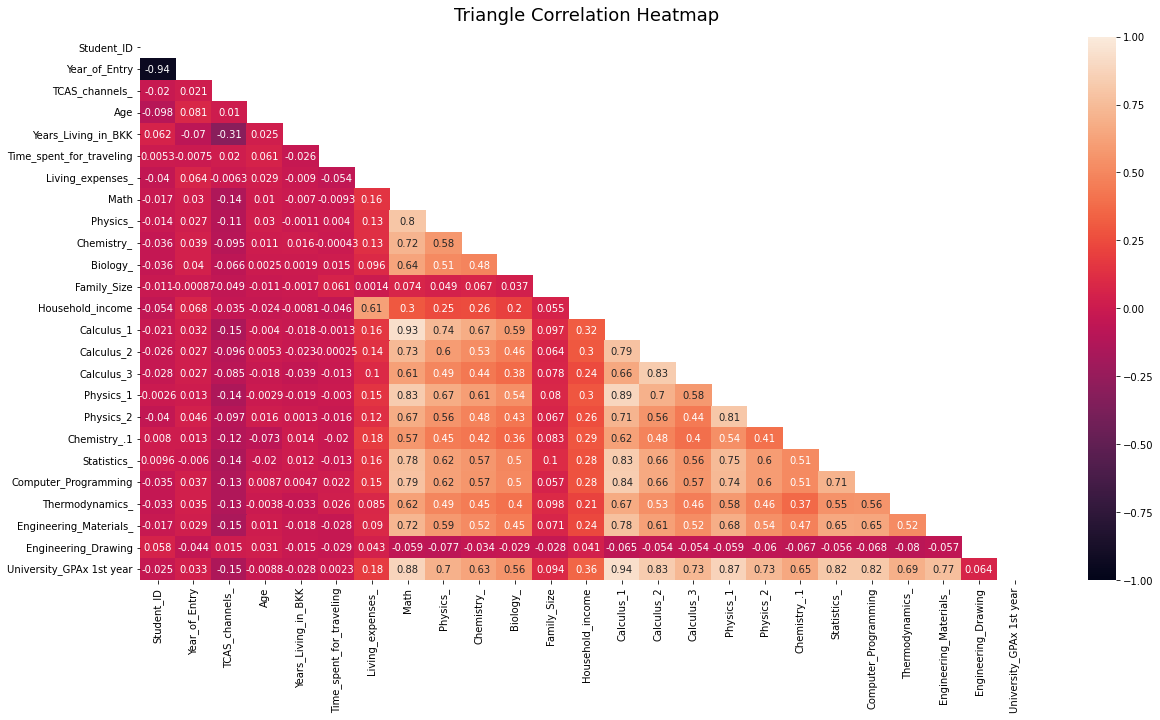

In [7]:
mask = np.triu(np.ones_like(correlation_matrix, dtype=np.bool))
plt.figure(figsize=(20, 10))
heatmap = sns.heatmap(correlation_matrix, mask=mask, vmin=-1, vmax=1, annot=True)
heatmap.set_title('Triangle Correlation Heatmap', fontdict={'fontsize':18}, pad=16);

#4. **Data Clustering Session**

### Random Data for Activity : กิจกรรม data ที่มีใครเป็นพวกไหน จะแบ่งอย่างไรดี

In [ ]:
#import numpy as np
#import matplotlib.pyplot as plt

feature = ['mean','Household_income']
A = np.array(
[[ 66,12],
 [ 44,46],
 [ 72,  38],
 [ 54,   4],
 [ 45,  58],
 [ 64,   8],
 [ 69,   4],
 [ 67,   4],
 [ 72,  38],
 [ 56,  12],
 [100,  46],
 [ 59,   4],
 [ 70,   8],
 [ 75,   4],
 [ 48,  17],
 [ 70,  50],
 [ 71,  12],
 [ 61,  12],
 [ 83,   8],
 [ 63,   4],
 [ 79,   4],
 [ 61,  33],
 [ 33,  79],
 [ 77,  50],
 [ 77, 12],
 [ 78,   8],
 [ 37,   4],
 [ 66,  17],
 [ 60,   8],
 [ 26,  71],
 [ 72,  58],
 [ 55,   4],
 [ 57,  12],
 [ 39,  50],
 [ 68,  38],
 [ 43,   4],
 [ 53,   4],
 [ 75,  21],
 [ 46,  58],
 [ 56,   4],
 [ 84,  46],
 [ 57, 100],
 [ 75,   4],
 [ 39,   4],
 [ 78,   4],
 [ 39,  12],
 [ 68,  50],
 [ 55,   4],
 [ 60,  33],
 [ 90,  12],]
)

plt.scatter(A[:,0], A[:,1], c='black', alpha=0.5)
plt.xlabel(feature[1], fontsize=18)
plt.ylabel(feature[0], fontsize=16)
plt.figure(figsize=(10, 10))
plt.show()

'''
from sklearn.cluster import KMeans



n_clusters = 5
kmeans = KMeans(n_clusters=n_clusters, random_state=10).fit(A)
cluster_labels = kmeans.fit_predict(A)

# Labeling the clusters
centers = kmeans.cluster_centers_
# Draw white circles at cluster centers
plt.scatter(
        centers[:, 0],
        centers[:, 1],
        marker="o",
        c="white",
        alpha=1,
        s=200,
        edgecolor="k",
    )

for i, c in enumerate(centers):
  plt.scatter(c[0], c[1], marker="$%d$" % (i+1), alpha=1, s=50, edgecolor="k")

plt.scatter(A[:,0], A[:,1], c=cluster_labels, alpha=0.5)
plt.xlabel(feature[1], fontsize=18)
plt.ylabel(feature[0], fontsize=16)
plt.figure(figsize=(10, 10))
plt.show()

#Random Data for Activity
'''
'''
random_size= 50
number_of_rows = X_S.shape[0]
random_indices = np.random.choice(number_of_rows, 
                                  size=random_size, 
                                  replace=False)
  
# display random rows
#print("\nRandom row:")
row = X_S[random_indices, :]
print(row)
plt.scatter(row[:,0], row[:,1], c='black', alpha=0.5)
plt.xlabel(feature[1], fontsize=18)
plt.ylabel(feature[0], fontsize=16)
plt.figure(figsize=(10, 10))
plt.show()
'''

### Load data

In [ ]:
import pandas as pd
df = pd.read_csv('https://raw.githubusercontent.com/charmy2525/DataAnalytics/main/Data%20analytics%20course%20data%20set%20-%20student%20academic%20performance%20-%20data.csv')

for i in range(len(df.columns)):
  print(i,df.columns[i])

## Single Feature Data Clustering

In [ ]:
df2 = df.iloc[: , 28:39].copy()
df2 = df2.apply(pd.to_numeric)
df2['mean'] = df2.mean(axis=1)
df2['Household_income'] = df['Household_income']
df2['Year'] = df['Year_of_Entry']
df2['Year'] = 4-(df2['Year'].apply(lambda x: int(x)) - 2017)


df2

เพิ่ม feature เกรดเฉลี่ยทุกรายวิชาที่สนใจ 
ดึงข้อมูลระยะเวลาเดินทางจากที่พักมาที่มหาวิทยาลัยมาเป็น feature ด้วย
ดึงข้อมูลปีที่เข้าศึกษามาเป็น feature ด้วย เน้นใช้กรองชุดข้อมูล แต่ละปี


In [ ]:
feature = ['mean','Household_income']

X = df2[feature].to_numpy()
X = X.astype('float')

X_S = X * 100 / X.max(axis=0)
X_S = np.round(X_S)
X_S

ใช้ scatter plot ดูความสัมพันธ์ของข้อมูล ในเบื้องต้นก่อนทำ clustering ว่าดูไปแล้วน่าจะได้ insight อะไรบ้างหรือไม่

In [ ]:
import plotly.express as px
colors = ['b', 'r', 'g']
feature = ['mean','Household_income']
filter ='Year'
fig = px.scatter_3d(df2, x=feature[1], y=filter, z=feature[0], color=filter)
fig.show()

เรียกใช้คำสั่ง K-Mean Clustering

In [ ]:
from sklearn.cluster import KMeans
import numpy as np

X = df2[feature].to_numpy()
X = X.astype('float')


Normalize data

In [ ]:
X_N = X / X.max(axis=0)


ตรวจสอบการ Normalization อีกครั้งว่า อยู่ระหว่าง 0 ถึง 1

In [ ]:
a = np.max(X_N, axis=0)
a

ทำ K-Mean Clustering

และแสดงผลการจัดกลุ่ม

In [ ]:
#kmeans = KMeans(n_clusters=8).fit(X_N)
#kmeans.labels_
#kmeans.predict(X_N)
n_clusters = 5
kmeans = KMeans(n_clusters=n_clusters, random_state=10).fit(X_N)
cluster_labels = kmeans.fit_predict(X_N)

import matplotlib.pyplot as plt

plt.scatter(X_N[:,0], X_N[:,1], c=cluster_labels, alpha=0.5)
plt.xlabel(feature[1], fontsize=18)
plt.ylabel(feature[0], fontsize=16)
plt.figure(figsize=(10, 10))
plt.show()
'''
kmeans.cluster_centers_
filter ='Year'
fig = px.scatter_3d(df2, x=feature[1], y=filter, z=feature[0], color=cluster_labels)
fig.show()
'''

In [ ]:
iterations = 20
centroids = None
centroids0 = centroids
for i in range(iterations):
    kmeans = KMeans(
        max_iter=1,
        n_init=1,
        init=(centroids if centroids is not None else 'k-means++'),
        n_clusters=n_clusters, 
        random_state=5)
    kmeans.fit(X_N)
    cluster_labels = kmeans.fit_predict(X_N)
    centroids = kmeans.cluster_centers_
    if centroids0 is not None :
      print(f'iter: {i} - centroid:{centroids}\n - diff :{centroids - centroids0}')
    centroids0 = centroids

    plt.scatter(X_N[:,0], X_N[:,1], c=cluster_labels, alpha=0.5)
    plt.xlabel(feature[1], fontsize=18)
    plt.ylabel(feature[0], fontsize=16)
    plt.figure(figsize=(10, 10))
    plt.show()

### Clustering Evaluation 
silhouette
pseudo-F

silhouette

In [ ]:
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.cm as cm
min_k = 2
max_k = 25
range_n_clusters = range(min_k,max_k+1)
silhouette_array = []
x_max = min_k
y_max = -1
for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X_N) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    #clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    #cluster_labels = clusterer.fit_predict(X)

    kmeans = KMeans(n_clusters=n_clusters, random_state=10).fit(X_N)
    cluster_labels = kmeans.fit_predict(X_N)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X_N, cluster_labels)
    if silhouette_avg >= y_max :
      x_max = n_clusters
      y_max = silhouette_avg
    silhouette_array.append(silhouette_avg)
    print(
        "For n_clusters =",
        n_clusters,
        "The average silhouette_score is :",
        silhouette_avg,
    )

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X_N, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(
            np.arange(y_lower, y_upper),
            0,
            ith_cluster_silhouette_values,
            facecolor=color,
            edgecolor=color,
            alpha=0.7,
        )

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(
        X_N[:, 0], X_N[:, 1], marker=".", s=30, lw=0, alpha=0.7, c=colors, edgecolor="k"
    )

    # Labeling the clusters
    centers = kmeans.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(
        centers[:, 0],
        centers[:, 1],
        marker="o",
        c="white",
        alpha=1,
        s=200,
        edgecolor="k",
    )

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker="$%d$" % i, alpha=1, s=50, edgecolor="k")

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(
        "Silhouette analysis for KMeans clustering on sample data with n_clusters = %d"
        % n_clusters,
        fontsize=14,
        fontweight="bold",
    )

plt.figure(figsize=(16,8))
plt.plot(range_n_clusters, silhouette_array, 'bx-')
plt.xlabel('k')
plt.ylabel('Average Silhouette')
plt.title('The Elbow Method showing the optimal k')
plt.scatter( x_max , y_max ,marker="$%d$" % x_max, s=1000 ,  facecolors='none', edgecolors='blue' ) 

plt.show()

In [ ]:
#kmeans = KMeans(n_clusters=8).fit(X_N)
#kmeans.labels_
#kmeans.predict(X_N)
n_clusters = x_max
kmeans = KMeans(n_clusters=n_clusters, random_state=10).fit(X_N)
cluster_labels = kmeans.fit_predict(X_N)

import matplotlib.pyplot as plt

plt.scatter(X_N[:,0], X_N[:,1], c=cluster_labels, alpha=0.5)
plt.xlabel(feature[1], fontsize=18)
plt.ylabel(feature[0], fontsize=16)
plt.figure(figsize=(10, 10))
plt.show()

kmeans.cluster_centers_

fig = px.scatter_3d(df2, x=feature[1], y=filter, z=feature[0], color=cluster_labels)
fig.show()

pseudo-F

In [ ]:
from scipy.stats import f

xx=0
for i in range(x_max):
  xx += sum(kmeans.labels_==i)*np.linalg.norm(kmeans.cluster_centers_[i]-np.mean(X_N, axis=0))

pseudoF = (xx/(x_max-1))/(kmeans.inertia_/(len(X_N)-x_max))
print(pseudoF)


alpha = 0.05
p_value = 1-f.cdf(pseudoF, x_max-1, len(X_N)-x_max)
if p_value < alpha :
  print(f"There are :{x_max} clusters in the data with p-value = {round(p_value,3)} with alpha = {alpha} ")
else:
  print(f"There are no clusters in the data with p-value = {round(p_value,3)} with alpha = {alpha} ")


In [ ]:
'''
import matplotlib.cm as cm
min_k = 2
max_k = 15
range_n_clusters = range(min_k,max_k+1)
pseudo_F_array = []
x_max = min_k
y_max = -1
for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax2) = plt.subplots(1, 1)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X_N) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    #clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    #cluster_labels = clusterer.fit_predict(X)

    kmeans = KMeans(n_clusters=n_clusters, random_state=10).fit(X_N)
    cluster_labels = kmeans.fit_predict(X_N)

    xx=0
    for i in range(n_clusters):
      xx += sum(kmeans.labels_==i)*np.linalg.norm(kmeans.cluster_centers_[i]-np.mean(X_N, axis=0))
    print(n_clusters)
    pseudoF = (xx/(n_clusters-1))/(kmeans.inertia_/(len(X_N)-n_clusters))

    if pseudoF >= y_max :
      x_max = n_clusters
      y_max = pseudoF
    pseudo_F_array.append(pseudoF)
    print(
        "For n_clusters =",
        n_clusters,
        "The pseudo_F is :",
        pseudoF,
    )

    y_lower = 10       

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(
        X_N[:, 0], X_N[:, 1], marker=".", s=30, lw=0, alpha=0.7, c=colors, edgecolor="k"
    )

    # Labeling the clusters
    centers = kmeans.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(
        centers[:, 0],
        centers[:, 1],
        marker="o",
        c="white",
        alpha=1,
        s=200,
        edgecolor="k",
    )

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker="$%d$" % (i+1), alpha=1, s=50, edgecolor="k")

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(
        "pseudo_F analysis for KMeans clustering on sample data with n_clusters = %d"
        % n_clusters,
        fontsize=14,
        fontweight="bold",
    )

plt.figure(figsize=(16,8))
plt.plot(range_n_clusters, pseudo_F_array, 'bx-')
plt.xlabel('k')
plt.ylabel('pseudo_F')
plt.title('The Elbow Method showing the optimal k')
plt.scatter( x_max , y_max , s=1000 ,  facecolors='none', edgecolors='blue' ) 

plt.show()
'''

In [ ]:
'''
#kmeans = KMeans(n_clusters=8).fit(X_N)
#kmeans.labels_
#kmeans.predict(X_N)
n_clusters = x_max
kmeans = KMeans(n_clusters=n_clusters, random_state=10).fit(X_N)
cluster_labels = kmeans.fit_predict(X_N)

import matplotlib.pyplot as plt

plt.scatter(X_N[:,0], X_N[:,1], c=cluster_labels, alpha=0.5)
plt.xlabel(feature[1], fontsize=18)
plt.ylabel(feature[0], fontsize=16)
plt.figure(figsize=(10, 10))
plt.show()

kmeans.cluster_centers_

fig = px.scatter_3d(df2, x=feature[1], y=filter, z=feature[0], color=cluster_labels)
fig.show()
'''

Elbow Method with SSE

In [ ]:
from sklearn.cluster import KMeans
import matplotlib.cm as cm
import matplotlib.pyplot as plt
min_k = 2
max_k = 15
range_n_clusters = range(min_k,max_k+1)
SSE_array = []
x_min = min_k
y_min = 0
z_min = 1000000
z = None
for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X_N) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
 
    kmeans = KMeans(n_clusters=n_clusters, random_state=10).fit(X_N)
    cluster_labels = kmeans.fit_predict(X_N)

    if (z is not None) and (((z/kmeans.inertia_) - 1) >= y_min) :
      x_min = n_clusters
      y_min = (z/kmeans.inertia_)-1
      z_min = kmeans.inertia_
    
    if (z is not None) : 
      A = ((z/kmeans.inertia_) -1 )
    else :
      A = 'N/A'
    SSE_array.append(kmeans.inertia_)
    print(
        "For n_clusters =",
        n_clusters,
        "The SSE is :",
        kmeans.inertia_,
        "The SSE change% is :",
        A,
    )

    z = kmeans.inertia_
    y_lower = 10       

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(
        X_N[:, 0], X_N[:, 1], marker=".", s=30, lw=0, alpha=0.7, c=colors, edgecolor="k"
    )

    # Labeling the clusters
    centers = kmeans.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(
        centers[:, 0],
        centers[:, 1],
        marker="o",
        c="white",
        alpha=1,
        s=200,
        edgecolor="k",
    )

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker="$%d$" % (i+1), alpha=1, s=50, edgecolor="k")

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(
        "SSE analysis for KMeans clustering on sample data with n_clusters = %d"
        % n_clusters,
        fontsize=14,
        fontweight="bold",
    )

plt.figure(figsize=(16,8))
plt.plot(range_n_clusters, SSE_array, 'bx-')
plt.xlabel('k')
plt.ylabel('SSE')
plt.title('The Elbow Method showing the optimal k')
plt.scatter( x_min , z_min ,marker="$%d$" % x_min, s=1000 ,  facecolors='none', edgecolors='blue' ) 

plt.show()

In [ ]:
#kmeans = KMeans(n_clusters=8).fit(X_N)
#kmeans.labels_
#kmeans.predict(X_N)
n_clusters = x_min
kmeans = KMeans(n_clusters=n_clusters, random_state=10).fit(X_N)
cluster_labels = kmeans.fit_predict(X_N)

import matplotlib.pyplot as plt

plt.scatter(X_N[:,0], X_N[:,1], c=cluster_labels, alpha=0.5)
plt.xlabel(feature[1], fontsize=18)
plt.ylabel(feature[0], fontsize=16)
plt.figure(figsize=(10, 10))
plt.show()

kmeans.cluster_centers_

fig = px.scatter_3d(df2, x=feature[1], y=filter, z=feature[0], color=cluster_labels)
fig.show()

## Multiple Features Data Clustering

Load data

In [ ]:
# imports
import pandas as pd
df = pd.read_csv('https://raw.githubusercontent.com/charmy2525/DataAnalytics/main/Data%20analytics%20course%20data%20set%20-%20student%20academic%20performance%20-%20data.csv')


In [ ]:


import plotly.express as px
colors = ['b', 'r', 'g']
feature = ['mean','Household_income','Time_spent_for_traveling']
df2['Time_spent_for_traveling'] = df['Time_spent_for_traveling']
filter ='Year'
fig = px.scatter_3d(df2, x=feature[1], y=filter, z=feature[0], color=filter)
fig.show()

fig = px.scatter_3d(df2, x=feature[2], y=filter, z=feature[0], color=filter)
fig.show()



เรียกใช้คำสั่ง K-Mean Clustering

In [ ]:
from sklearn.cluster import KMeans
import numpy as np

X = df2[feature].to_numpy()
X = X.astype('float')
X

Normalize data

In [ ]:
X_N = X / X.max(axis=0)
X_N

ตรวจสอบการ Normalization อีกครั้งว่า อยู่ระหว่าง 0 ถึง 1

In [ ]:
a = np.max(X_N, axis=0)
a

ทำ K-Mean Clustering

และแสดงผลการจัดกลุ่ม

In [ ]:
#kmeans = KMeans(n_clusters=8).fit(X_N)
#kmeans.labels_
#kmeans.predict(X_N)
n_clusters = 5
kmeans = KMeans(n_clusters=n_clusters, random_state=10).fit(X_N)
cluster_labels = kmeans.fit_predict(X_N)

import matplotlib.pyplot as plt

plt.scatter(X_N[:,0], X_N[:,1], c=cluster_labels, alpha=0.5)
plt.xlabel(feature[1], fontsize=18)
plt.ylabel(feature[0], fontsize=16)
plt.figure(figsize=(10, 10))
plt.show()

'''
kmeans.cluster_centers_
filter ='Year'
fig = px.scatter_3d(df2, x=feature[1], y=filter, z=feature[0], color=cluster_labels)
fig.show()
'''

plt.scatter(X_N[:,0], X_N[:,2], c=cluster_labels, alpha=0.5)
plt.xlabel(feature[2], fontsize=18)
plt.ylabel(feature[0], fontsize=16)
plt.figure(figsize=(10, 10))
plt.show()

kmeans.cluster_centers_
#filter ='Year'
fig = px.scatter_3d(df2, x=feature[2], y=feature[1], z=feature[0], color=cluster_labels)
fig.show()

In [ ]:
iterations = 20
centroids = None
centroids0 = centroids
for i in range(iterations):
    kmeans = KMeans(
        max_iter=1,
        n_init=1,
        init=(centroids if centroids is not None else 'k-means++'),
        n_clusters=n_clusters, 
        random_state=1)
    kmeans.fit(X_N)
    cluster_labels = kmeans.fit_predict(X_N)
    centroids = kmeans.cluster_centers_
    if centroids0 is not None :
      print(f'iter: {i} - centroid:{centroids} - diff :{centroids - centroids0}')
    centroids0 = centroids
    '''
    fig = px.scatter_3d(df2, x=feature[1], y=filter, z=feature[0], color=cluster_labels)
    fig.show()
    '''
    fig = px.scatter_3d(df2, x=feature[2], y=feature[1], z=feature[0], color=cluster_labels)
    fig.show()
    

### Clustering Evaluation 
silhouette
pseudo-F

silhouette

In [ ]:
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.cm as cm
min_k = 2
max_k = 25
range_n_clusters = range(min_k,max_k+1)
silhouette_array = []
x_max = min_k
y_max = -1
for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X_N) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    #clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    #cluster_labels = clusterer.fit_predict(X)

    kmeans = KMeans(n_clusters=n_clusters, random_state=10).fit(X_N)
    cluster_labels = kmeans.fit_predict(X_N)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X_N, cluster_labels)
    if silhouette_avg >= y_max :
      x_max = n_clusters
      y_max = silhouette_avg
    silhouette_array.append(silhouette_avg)
    print(
        "For n_clusters =",
        n_clusters,
        "The average silhouette_score is :",
        silhouette_avg,
    )

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X_N, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(
            np.arange(y_lower, y_upper),
            0,
            ith_cluster_silhouette_values,
            facecolor=color,
            edgecolor=color,
            alpha=0.7,
        )

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(
        X_N[:, 0], X_N[:, 1], marker=".", s=30, lw=0, alpha=0.7, c=colors, edgecolor="k"
    )

    # Labeling the clusters
    centers = kmeans.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(
        centers[:, 0],
        centers[:, 1],
        marker="o",
        c="white",
        alpha=1,
        s=200,
        edgecolor="k",
    )

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker="$%d$" % i, alpha=1, s=50, edgecolor="k")

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(
        "Silhouette analysis for KMeans clustering on sample data with n_clusters = %d"
        % n_clusters,
        fontsize=14,
        fontweight="bold",
    )

plt.figure(figsize=(16,8))
plt.plot(range_n_clusters, silhouette_array, 'bx-')
plt.xlabel('k')
plt.ylabel('Average Silhouette')
plt.title('The Elbow Method showing the optimal k')
plt.scatter( x_max , y_max ,marker="$%d$" % x_max, s=1000 ,  facecolors='none', edgecolors='blue' ) 

plt.show()

In [ ]:
#kmeans = KMeans(n_clusters=8).fit(X_N)
#kmeans.labels_
#kmeans.predict(X_N)
n_clusters = x_max
kmeans = KMeans(n_clusters=n_clusters, random_state=10).fit(X_N)
cluster_labels = kmeans.fit_predict(X_N)

import matplotlib.pyplot as plt

plt.scatter(X_N[:,0], X_N[:,1], c=cluster_labels, alpha=0.5)
plt.xlabel(feature[1], fontsize=18)
plt.ylabel(feature[0], fontsize=16)
plt.figure(figsize=(10, 10))
plt.show()

kmeans.cluster_centers_

fig = px.scatter_3d(df2, x=feature[1], y=filter, z=feature[0], color=cluster_labels)
fig.show()

plt.scatter(X_N[:,0], X_N[:,2], c=cluster_labels, alpha=0.5)
plt.xlabel(feature[2], fontsize=18)
plt.ylabel(feature[0], fontsize=16)
plt.figure(figsize=(10, 10))
plt.show()

kmeans.cluster_centers_

fig = px.scatter_3d(df2, x=feature[2], y=filter, z=feature[0], color=cluster_labels)
fig.show()

pseudo-F

In [ ]:
from scipy.stats import f

xx=0
for i in range(x_max):
  xx += sum(kmeans.labels_==i)*np.linalg.norm(kmeans.cluster_centers_[i]-np.mean(X_N, axis=0))

pseudoF = (xx/(x_max-1))/(kmeans.inertia_/(len(X_N)-x_max))
print(pseudoF)


alpha = 0.05
p_value = 1-f.cdf(pseudoF, x_max-1, len(X_N)-x_max)
if p_value < alpha :
  print(f"There are :{x_max} clusters in the data with p-value = {round(p_value,3)} with alpha = {alpha} ")
else:
  print(f"There are no clusters in the data with p-value = {round(p_value,3)} with alpha = {alpha} ")


In [ ]:
import matplotlib.cm as cm
min_k = 2
max_k = 15
range_n_clusters = range(min_k,max_k+1)
pseudo_F_array = []
x_max = min_k
y_max = -1
for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax2) = plt.subplots(1, 1)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X_N) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    #clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    #cluster_labels = clusterer.fit_predict(X)

    kmeans = KMeans(n_clusters=n_clusters, random_state=10).fit(X_N)
    cluster_labels = kmeans.fit_predict(X_N)

    xx=0
    for i in range(n_clusters):
      xx += sum(kmeans.labels_==i)*np.linalg.norm(kmeans.cluster_centers_[i]-np.mean(X_N, axis=0))
    print(n_clusters)
    pseudoF = (xx/(n_clusters-1))/(kmeans.inertia_/(len(X_N)-n_clusters))

    if pseudoF >= y_max :
      x_max = n_clusters
      y_max = pseudoF
    pseudo_F_array.append(pseudoF)
    print(
        "For n_clusters =",
        n_clusters,
        "The pseudo_F is :",
        pseudoF,
    )

    y_lower = 10       

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(
        X_N[:, 0], X_N[:, 1], marker=".", s=30, lw=0, alpha=0.7, c=colors, edgecolor="k"
    )

    # Labeling the clusters
    centers = kmeans.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(
        centers[:, 0],
        centers[:, 1],
        marker="o",
        c="white",
        alpha=1,
        s=200,
        edgecolor="k",
    )

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker="$%d$" % (i+1), alpha=1, s=50, edgecolor="k")

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(
        "pseudo_F analysis for KMeans clustering on sample data with n_clusters = %d"
        % n_clusters,
        fontsize=14,
        fontweight="bold",
    )

plt.figure(figsize=(16,8))
plt.plot(range_n_clusters, pseudo_F_array, 'bx-')
plt.xlabel('k')
plt.ylabel('pseudo_F')
plt.title('The Elbow Method showing the optimal k')
plt.scatter( x_max , y_max , s=1000 ,  facecolors='none', edgecolors='blue' ) 

plt.show()

In [ ]:
#kmeans = KMeans(n_clusters=8).fit(X_N)
#kmeans.labels_
#kmeans.predict(X_N)
n_clusters = x_max
kmeans = KMeans(n_clusters=n_clusters, random_state=10).fit(X_N)
cluster_labels = kmeans.fit_predict(X_N)

import matplotlib.pyplot as plt

plt.scatter(X_N[:,0], X_N[:,1], c=cluster_labels, alpha=0.5)
plt.xlabel(feature[1], fontsize=18)
plt.ylabel(feature[0], fontsize=16)
plt.figure(figsize=(10, 10))
plt.show()

kmeans.cluster_centers_

fig = px.scatter_3d(df2, x=feature[1], y=filter, z=feature[0], color=cluster_labels)
fig.show()

Elbow Method with SSE

In [ ]:
import matplotlib.cm as cm
min_k = 2
max_k = 15
range_n_clusters = range(min_k,max_k+1)
SSE_array = []
x_min = min_k
y_min = 0
z_min = 1000000
z = None
for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax2) = plt.subplots(1, 1)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X_N) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
 
    kmeans = KMeans(n_clusters=n_clusters, random_state=10).fit(X_N)
    cluster_labels = kmeans.fit_predict(X_N)

    if (z is not None) and (((z/kmeans.inertia_) - 1) >= y_min) :
      x_min = n_clusters
      y_min = (z/kmeans.inertia_)-1
      z_min = kmeans.inertia_
    
    if (z is not None) : 
      A = ((z/kmeans.inertia_) -1 )
    else :
      A = 'N/A'
    SSE_array.append(kmeans.inertia_)
    print(
        "For n_clusters =",
        n_clusters,
        "The SSE is :",
        kmeans.inertia_,
        "The SSE change% is :",
        A,
    )

    z = kmeans.inertia_
    y_lower = 10       

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(
        X_N[:, 0], X_N[:, 1], marker=".", s=30, lw=0, alpha=0.7, c=colors, edgecolor="k"
    )

    # Labeling the clusters
    centers = kmeans.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(
        centers[:, 0],
        centers[:, 1],
        marker="o",
        c="white",
        alpha=1,
        s=200,
        edgecolor="k",
    )

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker="$%d$" % (i+1), alpha=1, s=50, edgecolor="k")

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(
        "SSE analysis for KMeans clustering on sample data with n_clusters = %d"
        % n_clusters,
        fontsize=14,
        fontweight="bold",
    )

plt.figure(figsize=(16,8))
plt.plot(range_n_clusters, SSE_array, 'bx-')
plt.xlabel('k')
plt.ylabel('SSE')
plt.title('The Elbow Method showing the optimal k')
plt.scatter( x_min , z_min ,marker="$%d$" % x_min, s=1000 ,  facecolors='none', edgecolors='blue' ) 

plt.show()

In [ ]:
#kmeans = KMeans(n_clusters=8).fit(X_N)
#kmeans.labels_
#kmeans.predict(X_N)
n_clusters = x_min
kmeans = KMeans(n_clusters=n_clusters, random_state=10).fit(X_N)
cluster_labels = kmeans.fit_predict(X_N)

import matplotlib.pyplot as plt

plt.scatter(X_N[:,0], X_N[:,1], c=cluster_labels, alpha=0.5)
plt.xlabel(feature[1], fontsize=18)
plt.ylabel(feature[0], fontsize=16)
plt.figure(figsize=(10, 10))
plt.show()

kmeans.cluster_centers_

fig = px.scatter_3d(df2, x=feature[1], y=filter, z=feature[0], color=cluster_labels)
fig.show()

#5. Data Classification Session

### Activity What is the class of this new data? 

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

A = np.array(
[[ 66,  12],
 [ 44,  46],
 [ 72,  38],
 [ 54,   4],
 [ 45,  58],
 [ 64,   8],
 [ 69,   4],
 [ 67,   4],
 [ 72,  38],
 [ 56,  12],
 [100,  46],
 [ 59,   4],
 [ 70,   8],
 [ 75,   4],
 [ 48,  17],
 [ 70,  50],
 [ 71,  12],
 [ 61,  12],
 [ 83,   8],
 [ 63,   4],
 [ 79,   4],
 [ 61,  33],
 [ 33,  79],
 [ 77,  50],
 [ 77, 12],
 [ 78,   8],
 [ 37,   4],
 [ 66,  17],
 [ 60,   8],
 [ 26,  71],
 [ 72,  58],
 [ 55,   4],
 [ 57,  12],
 [ 39,  50],
 [ 68,  38],
 [ 43,   4],
 [ 53,   4],
 [ 75,  21],
 [ 46,  58],
 [ 56,   4],
 [ 84,  46],
 [ 57, 100],
 [ 75,   4],
 [ 39,   4],
 [ 78,   4],
 [ 39,  12],
 [ 68,  50],
 [ 55,   4],
 [ 60,  33],
 [ 90,  12],]
)




'''
class_data = pd.DataFrame(A,columns=feature)
plt.scatter(A[:,0], A[:,1], c='black', alpha=0.5,s=100)
plt.xlabel(feature[1], fontsize=18)
plt.ylabel(feature[0], fontsize=16)
plt.figure(figsize=(30, 30))
plt.show()
'''
A_clusters = 5
kmeans = KMeans(n_clusters=A_clusters, random_state=10).fit(A)
A_labels = kmeans.fit_predict(A)

# Labeling the clusters
centers = kmeans.cluster_centers_
# Draw white circles at cluster centers
plt.figure(figsize=(20, 10))
plt.scatter(
        centers[:, 0],
        centers[:, 1],
        marker="o",
        c="white",
        alpha=1,
        s=500,
        edgecolor="k",
    )

for i, c in enumerate(centers):
  plt.scatter(c[0], c[1], marker="$%d$" % (i+1), alpha=1, s=300, edgecolor="k")

plt.scatter(A[:,0], A[:,1], c=A_labels, alpha=0.5, s=100)

feature = ['mean','Calculus_1']#2feature
plt.xlabel(feature[1], fontsize=16)
plt.ylabel(feature[0], fontsize=16)

plt.show()

### Load data and cluster

In [ ]:
import pandas as pd
df = pd.read_csv('https://raw.githubusercontent.com/charmy2525/DataAnalytics/main/Data%20analytics%20course%20data%20set%20-%20student%20academic%20performance%20-%20data.csv')

df2 = df.iloc[: , 28:39].copy()
df2 = df2.apply(pd.to_numeric)
df2['mean'] = df2.mean(axis=1)
df2['Household_income'] = df['Household_income']
df2['Time_spent_for_traveling']=df['Time_spent_for_traveling']
df2['Year'] = df['Year_of_Entry']
df2['Year'] = 4-(df2['Year'].apply(lambda x: int(x)) - 2017)


feature = ['mean','Household_income','Time_spent_for_traveling']

import numpy as np

X = df2[feature].to_numpy()
X = X.astype('float')

X_N = X / X.max(axis=0)

from sklearn.cluster import KMeans
import matplotlib.cm as cm
import matplotlib.pyplot as plt
min_k = 2
max_k = 15
range_n_clusters = range(min_k,max_k+1)
SSE_array = []
x_min = min_k
y_min = 0
z_min = 1000000
z = None
for n_clusters in range_n_clusters:
    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
 
    kmeans = KMeans(n_clusters=n_clusters, random_state=10).fit(X_N)
    cluster_labels = kmeans.fit_predict(X_N)

    if (z is not None) and (((z/kmeans.inertia_) - 1) >= y_min) :
      x_min = n_clusters
      y_min = (z/kmeans.inertia_)-1
      z_min = kmeans.inertia_
    
    if (z is not None) : 
      A = ((z/kmeans.inertia_) -1 )
    else :
      A = 'N/A'
    SSE_array.append(kmeans.inertia_)

    z = kmeans.inertia_
    y_lower = 10       

n_clusters = x_min
kmeans = KMeans(n_clusters=n_clusters, random_state=10).fit(X_N)
cluster_labels = kmeans.fit_predict(X_N)

import matplotlib.pyplot as plt

plt.scatter(X_N[:,0], X_N[:,1], c=cluster_labels, alpha=0.5)
plt.xlabel(feature[1], fontsize=18)
plt.ylabel(feature[0], fontsize=16)
plt.figure(figsize=(10, 10))
plt.show()

kmeans.cluster_centers_
import plotly.express as px

fig = px.scatter_3d(df2, x=feature[1], y=feature[2], z=feature[0], color=cluster_labels)
fig.show()

### Logistic Regression

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_N, cluster_labels, test_size=0.2, random_state=42,stratify=cluster_labels)
print('Train Shape X: {} Y : {}'.format(X_train.shape,y_train.shape))
print('Test Shape X: {} Y : {}’'.format(X_test.shape,y_test.shape))

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn import metrics
import math

logreg = LogisticRegression()
logreg.fit(X_train, y_train)

y_pred = logreg.predict(X_test)
print(classification_report(y_test, y_pred))
pred = []
run_len=10#len(X_test)
for i in range(run_len):
  #print(X_test[i])
  value = 1/(1+math.e**-(np.matmul(logreg.coef_,X_test[i].transpose())+logreg.intercept_))
  k=0
  for j in range(1,len(value)) : 
    if value[j] >= value[k] :      
      k=j
  pred.append(k)
  #print(len(value),y_pred[i])
#print(sum(y_pred-pred))
#print(y_pred)
for j in range(1,len(value)) : 
  print(f'It will be category {j} if p{j} is maximum, p{j} = 1/(1+e^-({logreg.intercept_[0]}+{logreg.coef_[j][0]}(X0)+{logreg.coef_[j][1]}(X1))')

### K Nearest Neighbor Algorithm

KNN library
Unweighted KNN

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_N, cluster_labels, test_size=0.2, random_state=42,stratify=cluster_labels)
print('Train Shape X: {} Y : {}'.format(X_train.shape,y_train.shape))
print('Test Shape X: {} Y : {}’'.format(X_test.shape,y_test.shape))

from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 5,metric='euclidean')

knn.fit(X_train,y_train)

answer = knn.predict(X_test)

'''
for i in range(len(X_test)):
  print(X_test[i],answer[i])
'''

from sklearn.metrics import classification_report
print(classification_report(y_test, answer))

Distance-Weighted KNN

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_N, cluster_labels, test_size=0.2, random_state=42,stratify=cluster_labels)
print('Train Shape X: {} Y : {}'.format(X_train.shape,y_train.shape))
print('Test Shape X: {} Y : {}’'.format(X_test.shape,y_test.shape))

from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 5, weights = 'distance',metric='euclidean')

knn.fit(X_train,y_train)

answer = knn.predict(X_test)

from sklearn.metrics import classification_report
print(classification_report(y_test, answer))

### Decision tree classification

In [ ]:
#Unlimited Max Depth
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_N, cluster_labels, test_size=0.2, random_state=42,stratify=cluster_labels)
print('Train Shape X: {} Y : {}'.format(X_train.shape,y_train.shape))
print('Test Shape X: {} Y : {}’'.format(X_test.shape,y_test.shape))

from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_text

# Create Decision Tree classifer object
#decision_tree = DecisionTreeClassifier()
decision_tree = DecisionTreeClassifier()

# Train Decision Tree Classifer
dct = decision_tree.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = dct.predict(X_test)

from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))


r = export_text(decision_tree, feature_names=feature)
print(r)

from sklearn.tree import export_graphviz
from six import StringIO
from IPython.display import Image  
import pydotplus

dot_data = StringIO()
export_graphviz(dct, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = feature,class_names=np.unique(cluster_labels).astype(str))
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())


In [ ]:
#Max Depth =3
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_N, cluster_labels, test_size=0.2, random_state=42,stratify=cluster_labels)
print('Train Shape X: {} Y : {}'.format(X_train.shape,y_train.shape))
print('Test Shape X: {} Y : {}’'.format(X_test.shape,y_test.shape))

from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_text

# Create Decision Tree classifer object
#decision_tree = DecisionTreeClassifier()
decision_tree = DecisionTreeClassifier(max_depth=3)

# Train Decision Tree Classifer
dct = decision_tree.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = dct.predict(X_test)

from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))


r = export_text(decision_tree, feature_names=feature)
print(r)

from sklearn.tree import export_graphviz
from six import StringIO
from IPython.display import Image  
import pydotplus

dot_data = StringIO()
export_graphviz(dct, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = feature,class_names=np.unique(cluster_labels).astype(str))
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())


In [ ]:
from sklearn import tree 
tree.plot_tree(dct, label=root)

#แถม Machine Learning

## Forecasting

Linear Regression

In [ ]:
'''
#Library
import numpy as np
import matplotlib.pyplot as plt
import statistics
from numpy import arange
from pandas import read_csv
from scipy.optimize import curve_fit
from matplotlib import pyplot
 
# define the true objective function
def objective(x, a, b):
	return a * x + b
 
# load the dataset
#url = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/longley.csv'
#dataframe = read_csv(url, header=None)

url2 = 'https://raw.githubusercontent.com/charmy2525/Logistics-Class/d8fe5c885a3d7ddafcbd6312dd543618f2ba4785/time_series_covid_19_confirmed_US-Sample.csv'
dataframe2 = read_csv(url2, header=None)
data = dataframe2.values
# choose the input and output variables
x, y = data[:, 0], data[:, -1]

# curve fit
output = statistics.variance(y) 
print(output)
popt, pcov = curve_fit(objective, x, y)
# summarize the parameter values
print(pcov)
print(popt)
a, b = popt
print('y = %.5f * x + %.5f' % (a, b))
# plot input vs output
e = np.repeat(output, 16)
#plt.errorbar(x, y, yerr=e, fmt="none")
#pyplot.scatter(x, y)
# define a sequence of inputs between the smallest and largest known inputs
x_line = arange(min(x), max(x), 1)
# calculate the output for the range
y_line = objective(x_line, a, b)

diffy =[]
for i in range(len(y_line)):
  a = abs(y[i+1]-y_line[i])
  diffy.append(a)
B= sum(diffy)
print(B)
# create a line plot for the mapping function
#pyplot.plot(x_line, y_line, '--', color='red')
#pyplot.show()
#print(diffy)
#print(y)
#print(y_line)

# create a line plot for the mapping function
pyplot.scatter(x, y)
pyplot.plot(x_line, y_line, '--', color='green')
pyplot.show()
'''

Non-Linear Regression polynomial

In [ ]:
'''
# fit a second degree polynomial to the economic data
from numpy import arange
from pandas import read_csv
from scipy.optimize import curve_fit
from matplotlib import pyplot
 
# define the true objective function
def objective(x, a, b, c):
	return a * x + b * x**2 + c
 
# load the dataset
#url = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/longley.csv'
#dataframe = read_csv(url, header=None)
#data = dataframe.values
# choose the input and output variables
#x, y = data[:, 4], data[:, -1]
# curve fit

# choose the input and output variables
x, y = data[:, 0], data[:, -1]

# curve fit
output = statistics.variance(y) 
popt, pcov = curve_fit(objective, x, y)
# summarize the parameter values
a, b, c = popt
print('y = %.5f * x + %.5f * x^2 + %.5f' % (a, b, c))
# plot input vs output
pyplot.scatter(x, y)
# define a sequence of inputs between the smallest and largest known inputs
x_line = arange(min(x), max(x), 1)
# calculate the output for the range
y_line = objective(x_line, a, b, c)
diffy =[]
for i in range(len(y_line)):
  a = abs(y[i+1]-y_line[i])
  diffy.append(a)
B= sum(diffy)
print('MAE = ',B)
# create a line plot for the mapping function
pyplot.plot(x_line, y_line, '--', color='red')
pyplot.show()
#print(diffy)
#print(y)
#print(y_line)
'''

5-degree Polynomial

In [ ]:
'''
# fit a fifth degree polynomial to the economic data
from numpy import arange
from pandas import read_csv
from scipy.optimize import curve_fit
from matplotlib import pyplot
 
# define the true objective function
def objective(x, a, b, c, d, e, f):
	return (a * x) + (b * x**2) + (c * x**3) + (d * x**4) + (e * x**5) + f
 
# load the dataset
#url = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/longley.csv'
#dataframe = read_csv(url, header=None)
#data = dataframe.values
# choose the input and output variables
#x, y = data[:, 4], data[:, -1]
# curve fit
popt, _ = curve_fit(objective, x, y)
# summarize the parameter values
a, b, c, d, e, f = popt
# plot input vs output
pyplot.scatter(x, y)
# define a sequence of inputs between the smallest and largest known inputs
#x_line = arange(min(x), max(x), 1)
# calculate the output for the range
#y_line = objective(x_line, a, b, c, d, e, f)
# create a line plot for the mapping function
#pyplot.plot(x_line, y_line, '--', color='red')
pyplot.show()
'''

Autoregression (AR)
The autoregression (AR) method models the next step in the sequence as a linear function of the observations at prior time steps.
The method is suitable for univariate time series without trend and seasonal components.

In [ ]:
'''
# AR example
from statsmodels.tsa.ar_model import AutoReg
from random import random

# fit a line to the economic data
from numpy import sin
from numpy import sqrt
from numpy import arange
from pandas import read_csv
from scipy.optimize import curve_fit
from matplotlib import pyplot

# contrived dataset
data = [x + random() for x in range(1, 100)]
data2 = dataframe2.values
# choose the input and output variables
x, y = data2[:, 0], data2[:, -1]
#print(y)
# fit model
'''
'''
model = AutoReg(data, lags=1)
model_fit = model.fit()
# make prediction
yhat = model_fit.predict(len(data), len(data))
'''
'''
model = AutoReg(y, lags=1)
model_fit = model.fit()
# make prediction

fig = plt.figure()
ax = plt.axes()

x_line = np.linspace(x[0], x[len(x)-1], len(x))
# calculate the output for the range
y_line  = model_fit.predict(0, len(y)-1)

x_predic = np.linspace(x[len(x)-1], x[len(x)-1]+101, 101)
yhat = model_fit.predict(len(y), len(y)+100)
# create a line plot for the mapping function
pyplot.scatter(x, y, color='pink')
pyplot.plot(x_line[:-1], y_line, '--', color='green')

pyplot.plot(x_predic, yhat, '--', color='red')
pyplot.show()
'''

Moving Average (MA)
The moving average (MA) method models the next step in the sequence as a linear function of the residual errors from a mean process at prior time steps.
A moving average model is different from calculating the moving average of the time series.
The method is suitable for univariate time series without trend and seasonal components.

In [ ]:
'''
# MA example
from statsmodels.tsa.arima.model import ARIMA
from random import random
# contrived dataset
data = [x + random() for x in range(1, 100)]
data2 = dataframe2.values
# choose the input and output variables
x, y = data2[:, 0], data2[:, -1]

# fit model
model = ARIMA(y, order=(0, 0, 1))
model_fit = model.fit()
# make prediction
fig = plt.figure()
ax = plt.axes()

x_line = np.linspace(x[0], x[len(x)-1], len(x))
# calculate the output for the range
y_line  = model_fit.predict(0, len(y)-1)

x_predic = np.linspace(x[len(x)-1], x[len(x)-1]+101, 101)
yhat = model_fit.predict(len(y), len(y)+100)
# create a line plot for the mapping function
pyplot.scatter(x, y, color='pink')
pyplot.plot(x_line, y_line, '--', color='green')

pyplot.plot(x_predic, yhat, '--', color='red')
pyplot.show()
'''

Autoregressive Moving Average (ARMA)
The Autoregressive Moving Average (ARMA) method models the next step in the sequence as a linear function of the observations and residual errors at prior time steps.
It combines both Autoregression (AR) and Moving Average (MA) models.
The method is suitable for univariate time series without trend and seasonal components.

In [ ]:
'''
# ARMA example
from statsmodels.tsa.arima.model import ARIMA
from random import random
# contrived dataset
data = [random() for x in range(1, 100)]
data2 = dataframe2.values
# choose the input and output variables
x, y = data2[:, 0], data2[:, -1]

# fit model
model = ARIMA(y, order=(2, 0, 1))
model_fit = model.fit()
# make prediction
fig = plt.figure()
ax = plt.axes()

x_line = np.linspace(x[0], x[len(x)-1], len(x))
# calculate the output for the range
y_line  = model_fit.predict(0, len(y)-1)

x_predic = np.linspace(x[len(x)-1], x[len(x)-1]+101, 101)
yhat = model_fit.predict(len(y), len(y)+100)
# create a line plot for the mapping function
pyplot.scatter(x, y, color='pink')
pyplot.plot(x_line, y_line, '--', color='green')

pyplot.plot(x_predic, yhat, '--', color='red')
pyplot.show()
'''

Autoregressive Integrated Moving Average (ARIMA)
The Autoregressive Integrated Moving Average (ARIMA) method models the next step in the sequence as a linear function of the differenced observations and residual errors at prior time steps.
It combines both Autoregression (AR) and Moving Average (MA) models as well as a differencing pre-processing step of the sequence to make the sequence stationary, called integration (I).
The method is suitable for univariate time series with trend and without seasonal components.

In [ ]:
'''
# ARIMA example
from statsmodels.tsa.arima.model import ARIMA
from random import random
# contrived dataset
data = [x + random() for x in range(1, 100)]
data2 = dataframe2.values
# choose the input and output variables
x, y = data2[:, 0], data2[:, -1]

# fit model
model = ARIMA(y, order=(1, 1, 1))
model_fit = model.fit()
# make prediction
fig = plt.figure()
ax = plt.axes()

x_line = np.linspace(x[0], x[len(x)-1], len(x))
# calculate the output for the range
y_line  = model_fit.predict(0, len(y)-1)

x_predic = np.linspace(x[len(x)-1], x[len(x)-1]+101, 101)
yhat = model_fit.predict(len(y), len(y)+100)
# create a line plot for the mapping function
pyplot.scatter(x, y, color='pink')
pyplot.plot(x_line, y_line, '--', color='green')

pyplot.plot(x_predic, yhat, '--', color='red')
pyplot.show()
'''

Seasonal Autoregressive Integrated Moving-Average (SARIMA)
The Seasonal Autoregressive Integrated Moving Average (SARIMA) method models the next step in the sequence as a linear function of the differenced observations, errors, differenced seasonal observations, and seasonal errors at prior time steps.
It combines the ARIMA model with the ability to perform the same autoregression, differencing, and moving average modeling at the seasonal level.
TThe method is suitable for univariate time series with trend and/or seasonal components.

In [ ]:
'''
# SARIMA example
from statsmodels.tsa.statespace.sarimax import SARIMAX
from random import random
# contrived dataset
data = [x + random() for x in range(1, 100)]
data2 = dataframe2.values
# choose the input and output variables
x, y = data2[:, 0], data2[:, -1]

# fit model
model = SARIMAX(y, order=(1, 1, 1), seasonal_order=(0, 0, 0, 0))
model_fit = model.fit(disp=False)
# make prediction
fig = plt.figure()
ax = plt.axes()

x_line = np.linspace(x[0], x[len(x)-1], len(x))
# calculate the output for the range
y_line  = model_fit.predict(0, len(y)-1)

x_predic = np.linspace(x[len(x)-1], x[len(x)-1]+101, 101)
yhat = model_fit.predict(len(y), len(y)+100)
# create a line plot for the mapping function
pyplot.scatter(x, y, color='pink')
pyplot.plot(x_line, y_line, '--', color='green')

pyplot.plot(x_predic, yhat, '--', color='red')
pyplot.show()
'''

Seasonal Autoregressive Integrated Moving-Average with Exogenous Regressors (SARIMAX)
The Seasonal Autoregressive Integrated Moving-Average with Exogenous Regressors (SARIMAX) is an extension of the SARIMA model that also includes the modeling of exogenous variables.
Exogenous variables are also called covariates and can be thought of as parallel input sequences that have observations at the same time steps as the original series. 

The primary series may be referred to as endogenous data to contrast it from the exogenous sequence(s). The observations for exogenous variables are included in the model directly at each time step and are not modeled in the same way as the primary endogenous sequence (e.g. as an AR, MA, etc. process).


The SARIMAX method can also be used to model the subsumed models with exogenous variables, such as ARX, MAX, ARMAX, and ARIMAX.
The method is suitable for univariate time series with trend and/or seasonal components and exogenous variables.



In [ ]:
'''
# SARIMAX example
from statsmodels.tsa.statespace.sarimax import SARIMAX
from random import random
# contrived dataset
data2 = dataframe2.values
# choose the input and output variables
x, y = data2[:, 0], data2[:, -1]

data1 = [z + random() for z in range(len(x))]

print(len(data1))
print(len(x))

#data2 = [x + random() for x in range(101, 200)]
# fit model
model = SARIMAX(y, exog=data1, order=(1, 1, 1), seasonal_order=(0, 0, 0, 0))
model_fit = model.fit(disp=False)
# make prediction
#exog2 = [200 + random()]

exog2 =[]
for i in range(len(y_line)):
  a = len(x) + random()
  exog2.append(a)


# make prediction
fig = plt.figure()
ax = plt.axes()

x_line = np.linspace(x[0], x[len(x)-1], len(x))
# calculate the output for the range
y_line  = model_fit.predict(0, len(y)-1, exog=[exog2])
print(len(y_line))
x_predic = np.linspace(x[len(x)-1], x[len(x)-1]+101, 101)
print(len(x_predic ))
print(x_predic)
print(len(y))

exog2 =[]
for i in range(101):
  a = len(x)+ random()
  exog2.append(a)

yhat = model_fit.predict(len(y), len(y)+100, exog=[exog2])
# create a line plot for the mapping function
pyplot.scatter(x, y, color='pink')
pyplot.plot(x_line, y_line, '--', color='green')

pyplot.plot(x_predic, yhat, '--', color='red')
pyplot.show()


'''

Vector Autoregression (VAR)
The Vector Autoregression (VAR) method models the next step in each time series using an AR model. It is the generalization of AR to multiple parallel time series, e.g. multivariate time series.
The method is suitable for multivariate time series without trend and seasonal components.



In [ ]:
'''
# VAR example
from statsmodels.tsa.vector_ar.var_model import VAR
from random import random
# contrived dataset with dependency
# contrived dataset
data2 = dataframe2.values
# choose the input and output variables
x, y = data2[:, 0], data2[:, -1]

data = list()
for i in range(len(x)):
    v1 = y[i]
    v2 = 2*v1 + random()
    row = [v1, v2]
    data.append(row)
# fit model
model = VAR(data)
model_fit = model.fit()
# make prediction
ydata2 = [i[1] for i in data]
pyplot.scatter(x, y, color='pink')
pyplot.scatter(x, ydata2, color='green')
x_predic = np.linspace(x[len(x)-1], x[len(x)-1]+101, 101)
yhat = model_fit.forecast(model_fit.y, steps=101)
y1 = [i[0] for i in yhat]
print(y1)
y2 = [i[1] for i in yhat]
print(y2)
pyplot.plot(x_predic, y1, '--', color='red')
pyplot.plot(x_predic, y2, '--', color='blue')
pyplot.show()
'''

Vector Autoregression Moving-Average (VARMA)
The Vector Autoregression Moving-Average (VARMA) method models the next step in each time series using an ARMA model. It is the generalization of ARMA to multiple parallel time series, e.g. multivariate time series.
The method is suitable for multivariate time series without trend and seasonal components.

In [ ]:
'''
# VARMA example
from statsmodels.tsa.statespace.varmax import VARMAX
from random import random
# contrived dataset with dependency
# contrived dataset
data2 = dataframe2.values
# choose the input and output variables
x, y = data2[:, 0], data2[:, -1]

data = list()
for i in range(len(x)):
    v1 = y[i]
    v2 = 2*v1 + random()
    row = [v1, v2]
    data.append(row)
# fit model
model = VARMAX(data, order=(1, 1))
model_fit = model.fit(disp=False)
# make prediction
ydata2 = [i[1] for i in data]
pyplot.scatter(x, y, color='pink')
pyplot.scatter(x, ydata2, color='green')
x_predic = np.linspace(x[len(x)-1], x[len(x)-1]+101, 101)
#yhat = model_fit.forecast( steps=101)
yhat = model_fit.predict(len(y), len(y)+100)
y1 = [i[0] for i in yhat]
y2 = [i[1] for i in yhat]
pyplot.plot(x_predic, y1, '--', color='red')
pyplot.plot(x_predic, y2, '--', color='blue')
pyplot.show()
'''

Vector Autoregression Moving-Average with Exogenous Regressors (VARMAX)
The Vector Autoregression Moving-Average with Exogenous Regressors (VARMAX) is an extension of the VARMA model that also includes the modeling of exogenous variables. It is a multivariate version of the ARMAX method.

Exogenous variables are also called covariates and can be thought of as parallel input sequences that have observations at the same time steps as the original series. The primary series(es) are referred to as endogenous data to contrast it from the exogenous sequence(s). The observations for exogenous variables are included in the model directly at each time step and are not modeled in the same way as the primary endogenous sequence (e.g. as an AR, MA, etc. process).

The VARMAX method can also be used to model the subsumed models with exogenous variables, such as VARX and VMAX.
The method is suitable for multivariate time series without trend and seasonal components with exogenous variables.

In [ ]:
'''
from statsmodels.tsa.statespace.varmax import VARMAX
from random import random
# contrived dataset with dependency
# contrived dataset
data2 = dataframe2.values
# choose the input and output variables
x, y = data2[:, 0], data2[:, -1]

data = list()
for i in range(len(x)):
    v1 = y[i]
    v2 = 2*v1 + random()
    row = [v1, v2]
    data.append(row)
data_exog = [z + random() for z in range(len(x))]
# fit model
model = VARMAX(data, exog=data_exog, order=(1, 1))
model_fit = model.fit(disp=False)
# make prediction
ydata2 = [i[1] for i in data]
pyplot.scatter(x, y, color='pink')
pyplot.scatter(x, ydata2, color='green')
x_predic = np.linspace(x[len(x)-1], x[len(x)-1]+101, 101)

data_exog2 =[]
for i in range(len(y_line)):
  a = len(x) + random()
  data_exog2.append(a)

data_exog2 =[]
for i in range(101):
  a = len(x) + random()
  data_exog2.append(a)

yhat = model_fit.predict(len(y), len(y)+100, exog=[exog2])
y1 = [i[0] for i in yhat]
y2 = [i[1] for i in yhat]
pyplot.plot(x_predic, y1, '--', color='red')
pyplot.plot(x_predic, y2, '--', color='blue')
pyplot.show()
'''

Simple Exponential Smoothing (SES)
The Simple Exponential Smoothing (SES) method models the next time step as an exponentially weighted linear function of observations at prior time steps.
The method is suitable for univariate time series without trend and seasonal components.



In [ ]:
'''
# SES example
from statsmodels.tsa.holtwinters import SimpleExpSmoothing
from random import random
# contrived dataset
data = [x + random() for x in range(1, 100)]

data2 = dataframe2.values
# choose the input and output variables
x, y = data2[:, 0], data2[:, -1]

# fit model
model = SimpleExpSmoothing(y)
model_fit = model.fit()
# make prediction
fig = plt.figure()
ax = plt.axes()
x_line = np.linspace(x[0], x[len(x)-1], len(x))
# calculate the output for the range
y_line  = model_fit.predict(0, len(y)-1)

x_predic = np.linspace(x[len(x)-1], x[len(x)-1]+101, 101)
yhat = model_fit.predict(len(y), len(y)+100)
# create a line plot for the mapping function
pyplot.scatter(x, y, color='pink')
pyplot.plot(x_line, y_line, '--', color='green')

pyplot.plot(x_predic, yhat, '--', color='red')
pyplot.show()
'''

Holt Winter’s Exponential Smoothing (HWES)
The Holt Winter’s Exponential Smoothing (HWES) also called the Triple Exponential Smoothing method models the next time step as an exponentially weighted linear function of observations at prior time steps, taking trends and seasonality into account.
The method is suitable for univariate time series with trend and/or seasonal components.

In [ ]:
'''
# HWES example
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from random import random
# contrived dataset
data = [x + random() for x in range(1, 100)]
data2 = dataframe2.values
# choose the input and output variables
x, y = data2[:, 0], data2[:, -1]

# fit model
model = ExponentialSmoothing(y)
model_fit = model.fit()
# make prediction
fig = plt.figure()
ax = plt.axes()
x_line = np.linspace(x[0], x[len(x)-1], len(x))
# calculate the output for the range
y_line  = model_fit.predict(0, len(y)-1)

x_predic = np.linspace(x[len(x)-1], x[len(x)-1]+101, 101)
yhat = model_fit.predict(len(y), len(y)+100)
# create a line plot for the mapping function
pyplot.scatter(x, y, color='pink')
pyplot.plot(x_line, y_line, '--', color='green')

pyplot.plot(x_predic, yhat, '--', color='red')
pyplot.show()
'''

## Deep Learning

In [ ]:
'''
import numpy
import matplotlib.pyplot as plt
import pandas
import math
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
import statistics
from scipy.optimize import curve_fit
'''

In [ ]:
'''
# fix random seed for reproducibility
numpy.random.seed(7)

# define the true objective function
def objective(x, a, b):
	return a * x + b
 
# load the dataset
url2 = 'https://raw.githubusercontent.com/charmy2525/Logistics-Class/d8fe5c885a3d7ddafcbd6312dd543618f2ba4785/time_series_covid_19_confirmed_US-Sample.csv'
dataframe2 = pandas.read_csv(url2, header=None)

data2 = dataframe2.values
# choose the input and output variables
x, y = data2[:, 0], data2[:, -1]
'''
'''
dataset = []
for i in range(len(y)):
  dataset.append(y[i])
'''
'''
dataset = data2
dataset = dataset.astype('float32')
dataset
'''

In [ ]:
'''
# normalize the dataset
scaler = MinMaxScaler(feature_range=(0,1))
dataset = scaler.fit_transform(dataset)
dataset[1:10]
'''

In [ ]:
'''
# split into train and test sets
train_size = int(len(dataset) * 0.67)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]
print(len(train), len(test))
'''

In [ ]:
'''
print(train[5,0],train[5][0])
'''

In [ ]:
'''
# convert an array of values into a dataset matrix
def create_dataset(dataset, look_back=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-look_back-1):
		a = dataset[i:(i+look_back), 0]
		dataX.append(a)
		dataY.append(dataset[i + look_back, 0])
	return numpy.array(dataX), numpy.array(dataY)
'''

In [ ]:
'''
# reshape into X=t and Y=t+1
look_back = 1
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)
'''

In [ ]:
'''
print(trainX[2][0])
print(trainY[2])
'''

In [ ]:
'''
# reshape input to be [samples, time steps, features]
trainX = numpy.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = numpy.reshape(testX, (testX.shape[0], 1, testX.shape[1]))

# create and fit the LSTM network
model = Sequential()
model.add(LSTM(4, input_shape=(1, look_back)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(trainX, trainY, epochs=100, batch_size=1, verbose=2)
'''

In [ ]:
'''
# make predictions
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)
len(trainPredict)

print(trainPredict.shape,trainY.shape)
print((trainPredict[1:20,0]-trainY[1:20])**2)
'''

In [ ]:
'''
# shift train predictions for plotting
trainPredictPlot = numpy.empty_like(dataset)
trainPredictPlot[:, :] = numpy.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(dataset)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(dataset)[:,0])

#plt.plot(scaler.inverse_transform(trainPredictPlot)[:,0])
plt.plot(scaler.inverse_transform(testPredictPlot)[:,0])
plt.show()
'''

In [ ]:
'''
print(scaler.inverse_transform(dataset)[:,0].shape)

print(scaler.inverse_transform(trainPredictPlot)[:,0].shape)
print(scaler.inverse_transform(testPredictPlot)[:,0].shape)
'''

In [ ]:
'''
import numpy as np
import tensorflow as tf
from tensorflow import keras
import pandas as pd
import seaborn as sns
from pylab import rcParams
import matplotlib.pyplot as plt
from matplotlib import rc
from pandas import read_csv
%matplotlib inline
%config InlineBackend.figure_format='retina'
sns.set(style='whitegrid', palette='muted', font_scale=1.5)
rcParams['figure.figsize'] = 16, 10
RANDOM_SEED = 42
np.random.seed(RANDOM_SEED)
tf.random.set_seed(RANDOM_SEED)
'''

In [ ]:
'''
url2 = 'https://raw.githubusercontent.com/charmy2525/Logistics-Class/d8fe5c885a3d7ddafcbd6312dd543618f2ba4785/time_series_covid_19_confirmed_US-Sample.csv'
dataframe2 = read_csv(url2, header=None)
data2 = dataframe2.values
# choose the input and output variables
x, y = data2[:, 0], data2[:, -1]
time=x
sin =y


time = np.arange(0, 100, 0.1)
sin = np.sin(time) + np.random.normal(scale=0.5, size=len(time))

'''

In [ ]:
'''
df = pd.DataFrame(dict(sine=sin), index=time, columns=['sine'])
train_size = int(len(df) * 0.8)
test_size = len(df) - train_size
train, test = df.iloc[0:train_size], df.iloc[train_size:len(df)]
print(len(train), len(test))
'''

In [ ]:
'''
df
'''

In [ ]:
'''
def create_dataset(X, y, time_steps=1):
    Xs, ys = [], []
    for i in range(len(X) - time_steps):
        v = X.iloc[i:(i + time_steps)].values
        Xs.append(v)
        ys.append(y.iloc[i + time_steps])
    return np.array(Xs), np.array(ys)
'''

In [ ]:
'''
time_steps = 50
# reshape to [samples, time_steps, n_features]
X_train, y_train = create_dataset(train, train.sine, time_steps)
X_test, y_test = create_dataset(test, test.sine, time_steps)
print(X_train.shape, y_train.shape)
print(X_train)
'''


In [ ]:
'''
print(y_train)
'''


In [ ]:
'''
model = keras.Sequential()
model.add(keras.layers.LSTM(
  units=128,
  return_sequences=True,
  input_shape=(X_train.shape[1], X_train.shape[2])
))
model.add(keras.layers.LSTM(128, return_sequences=True))  # returns a sequence of vectors of dimension 32
model.add(keras.layers.Dense(2, activation="relu", name="layer1"))
model.add(keras.layers.Dense(units=1, activation="relu"))


model.compile(
  loss='mean_squared_error',
  optimizer=keras.optimizers.Adam(0.001)
)

'''


In [ ]:
'''
history = model.fit(
    X_train, y_train,
    epochs=50,
    batch_size=30,
    validation_split=0.1,
    verbose=1,
    shuffle=False
)
'''


In [ ]:
'''
y_pred = model.predict(X_test)
'''


In [ ]:
'''
x_train_plot = np.linspace(time[0], time[len(X_train)-1], len(X_train))
plt.plot(x_train_plot, y_train, '--', color='green')
Xnum = len(X_test)+len(X_train)
x_test_plot = np.linspace(time[len(X_train)], time[Xnum-1], len(X_test))
plt.plot(x_test_plot, y_test, '--', color='blue')

x_test_plot = np.linspace(time[len(X_train)], time[Xnum-1], len(X_test))


y_pred_plot = []
for i in range(len(x_test_plot )) :
  y_pred_plot.append(y_pred[0][i])
plt.plot(x_test_plot, y_pred_plot, '--', color='red')
'''


In [ ]:
'''
y_se=[]
for i in range(len(y_pred)) :
  y_se.append((y_pred[i]-y_test[i])**2)
y_mse = sum(y_se) / len(y_se)
print('y_mse = ' ,y_mse[0][0])
y_se_plot=[]
for i in range(len(x_test_plot )) :
  y_se_plot.append(y_se[0][i])
plt.plot(x_test_plot, y_se_plot, '--', color='red')
'''
